In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = 'data.csv'
df = pd.read_csv(file, delimiter=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [4]:
# Создание словаря с переводами колонок
translations = {
    'Marital status': 'Семейное положение',
    'Application mode': 'Режим подачи заявки',
    'Application order': 'Порядок подачи заявки',
    'Course': 'Направление',
    'Daytime/evening attendance\t': 'Дневная/вечерняя форма обучения',
    'Previous qualification': 'Предыдущее образование',
    'Previous qualification (grade)': 'Предыдущее образование (оценка)',
    'Nacionality': 'Национальность',
    "Mother's qualification": 'Образование матери',
    "Father's qualification": 'Образование отца',
    "Mother's occupation": 'Профессия матери',
    "Father's occupation": 'Профессия отца',
    'Admission grade': 'Вступительный балл',
    'Displaced': 'Перемещенный',
    'Educational special needs': 'Образовательные специальные потребности',
    'Debtor': 'Должник',
    'Tuition fees up to date': 'Платежи за обучение актуальны',
    'Gender': 'Пол',
    'Scholarship holder': 'Получатель стипендии',
    'Age at enrollment': 'Возраст при зачислении',
    'International': 'Международный статус',
    'Curricular units 1st sem (credited)': 'Учебные единицы 1-го семестра (зачтенные)',
    'Curricular units 1st sem (enrolled)': 'Учебные единицы 1-го семестра (зачисленные)',
    'Curricular units 1st sem (evaluations)': 'Учебные единицы 1-го семестра (оценки)',
    'Curricular units 1st sem (approved)': 'Учебные единицы 1-го семестра (утвержденные)',
    'Curricular units 1st sem (grade)': 'Учебные единицы 1-го семестра (оценка)',
    'Curricular units 1st sem (without evaluations)': 'Учебные единицы 1-го семестра (без оценок)',
    'Curricular units 2nd sem (credited)': 'Учебные единицы 2-го семестра (зачтенные)',
    'Curricular units 2nd sem (enrolled)': 'Учебные единицы 2-го семестра (зачисленные)',
    'Curricular units 2nd sem (evaluations)': 'Учебные единицы 2-го семестра (оценки)',
    'Curricular units 2nd sem (approved)': 'Учебные единицы 2-го семестра (утвержденные)',
    'Curricular units 2nd sem (grade)': 'Учебные единицы 2-го семестра (оценка)',
    'Curricular units 2nd sem (without evaluations)': 'Учебные единицы 2-го семестра (без оценок)',
    'Unemployment rate': 'Уровень безработицы',
    'Inflation rate': 'Уровень инфляции',
    'GDP': 'ВВП',
    'Target': 'Цель'
}

# Переименование колонок в DataFrame
df.rename(columns=translations, inplace=True)

# Проверка обновленных названий колонок
df.columns

Index(['Семейное положение', 'Режим подачи заявки', 'Порядок подачи заявки',
       'Направление', 'Дневная/вечерняя форма обучения',
       'Предыдущее образование', 'Предыдущее образование (оценка)',
       'Национальность', 'Образование матери', 'Образование отца',
       'Профессия матери', 'Профессия отца', 'Вступительный балл',
       'Перемещенный', 'Образовательные специальные потребности', 'Должник',
       'Платежи за обучение актуальны', 'Пол', 'Получатель стипендии',
       'Возраст при зачислении', 'Международный статус',
       'Учебные единицы 1-го семестра (зачтенные)',
       'Учебные единицы 1-го семестра (зачисленные)',
       'Учебные единицы 1-го семестра (оценки)',
       'Учебные единицы 1-го семестра (утвержденные)',
       'Учебные единицы 1-го семестра (оценка)',
       'Учебные единицы 1-го семестра (без оценок)',
       'Учебные единицы 2-го семестра (зачтенные)',
       'Учебные единицы 2-го семестра (зачисленные)',
       'Учебные единицы 2-го семестра (оц

In [5]:
# Создание нового DataFrame
# Список нужных колонок
needed_columns = [
    'Режим подачи заявки',
    'Порядок подачи заявки',
    'Направление',
    'Дневная/вечерняя форма обучения',
    'Предыдущее образование',
    'Предыдущее образование (оценка)',
    'Вступительный балл',
    'Перемещенный',
    'Образовательные специальные потребности',
    'Пол',
    'Возраст при зачислении',
    'Получатель стипендии',
    'Международный статус',
    'Уровень безработицы',
    'Уровень инфляции',
    'ВВП'
]

# Создание нового DataFrame с выбранными колонками
new_df = df[needed_columns]

output_file_path = 'new_data.csv'
new_df.to_csv(output_file_path, index=False, encoding='utf-8-sig')


In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Режим подачи заявки                      4424 non-null   int64  
 1   Порядок подачи заявки                    4424 non-null   int64  
 2   Направление                              4424 non-null   int64  
 3   Дневная/вечерняя форма обучения          4424 non-null   int64  
 4   Предыдущее образование                   4424 non-null   int64  
 5   Предыдущее образование (оценка)          4424 non-null   float64
 6   Вступительный балл                       4424 non-null   float64
 7   Перемещенный                             4424 non-null   int64  
 8   Образовательные специальные потребности  4424 non-null   int64  
 9   Пол                                      4424 non-null   int64  
 10  Возраст при зачислении                   4424 no

In [7]:
new_df['Направление_код'], unique = pd.factorize(df['Направление'])


C:\Users\1645295\AppData\Local\Temp\ipykernel_19596\4180637307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Направление_код'], unique = pd.factorize(df['Направление'])


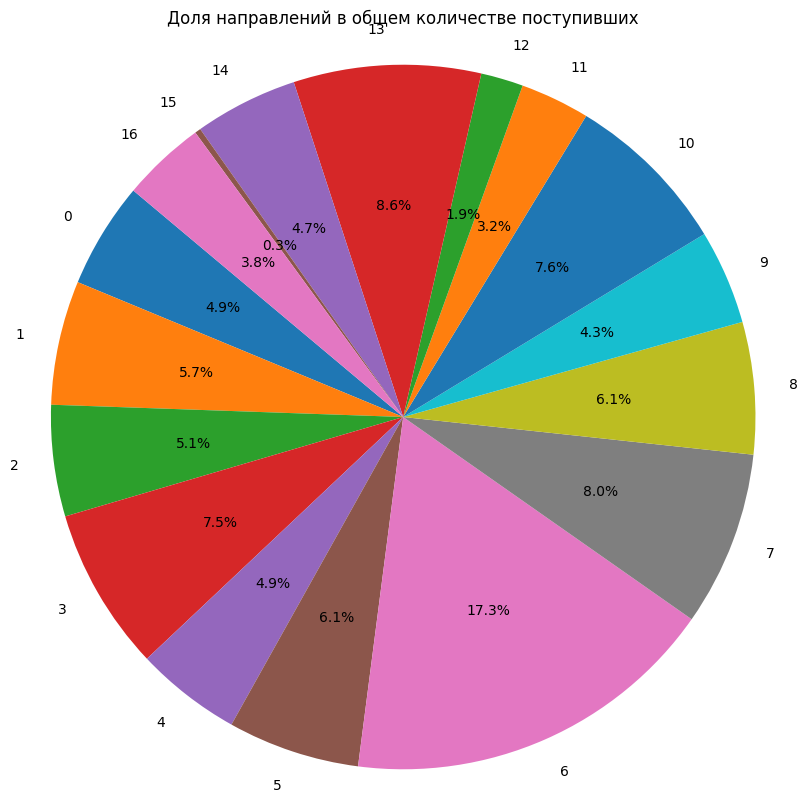

In [9]:
grouped_data = new_df.groupby('Направление_код').size().reset_index(name='Количество_поступивших')
grouped_data
# Визуализация данных
plt.figure(figsize=(10, 10))
plt.pie(grouped_data['Количество_поступивших'], labels=grouped_data['Направление_код'], autopct='%1.1f%%', startangle=140)
plt.title('Доля направлений в общем количестве поступивших')
plt.axis('equal')
plt.show()


создать новый столбец год который будет учитывать популярность направления и для самых популярных будет увеличиваться на 20% а для менее на 15% и совсем не популярных 10% каждый год   

In [8]:
df = pd.DataFrame(new_df)

# Подсчет количества студентов по направлениям
counts = df['Направление_код'].value_counts().reset_index()
counts.columns = ['Направление_код', 'Количество_поступивших']

# Определение коэффициентов роста
growth_factors = {
    # Самое популярное направление (6)
    6: [1.2, 1.44, 1.728],   # +20% каждый год
}

# Менее популярные направления (3, 7, 10 и 13)
for direction in [3, 7, 10, 13]:
    growth_factors[direction] = [1.15, 1.3225, 1.520875] # +15% каждый год

# Совсем не популярные направления (все остальные)
for direction in df['Направление_код']:
    if direction not in growth_factors:
        growth_factors[direction] = [1.1, 1.21, 1.331] # +10% каждый год


# Добавление нового столбца "Год"
years = [2022, 2023, 2024]
num_students = len(df)

# Назначение годов на основе индекса (через остаток от деления)
df['Год'] = [years[i % len(years)] for i in range(num_students)]

# Подсчет количества студентов по направлениям для каждого года с учетом коэффициентов роста
new_records = []

for index, row in df.iterrows():
    direction = row['Направление_код']
    year_index = years.index(row['Год']) # Получаем индекс года
    count = int(100 * growth_factors[direction][year_index]) # Начальное количество студентов
    
    new_records.append({'Год': row['Год'], 'Направление': direction})
# Создание нового DataFrame с распределением по годам
final_df = pd.DataFrame(new_records)

# Просмотр результатов
final_df

,Год,Направление
0,2022.0,0.0
1,2023.0,1.0
2,2024.0,2.0
3,2022.0,3.0
4,2023.0,4.0
...,...,...
4419,2022.0,3.0
4420,2023.0,3.0
4421,2024.0,6.0
4422,2022.0,13.0


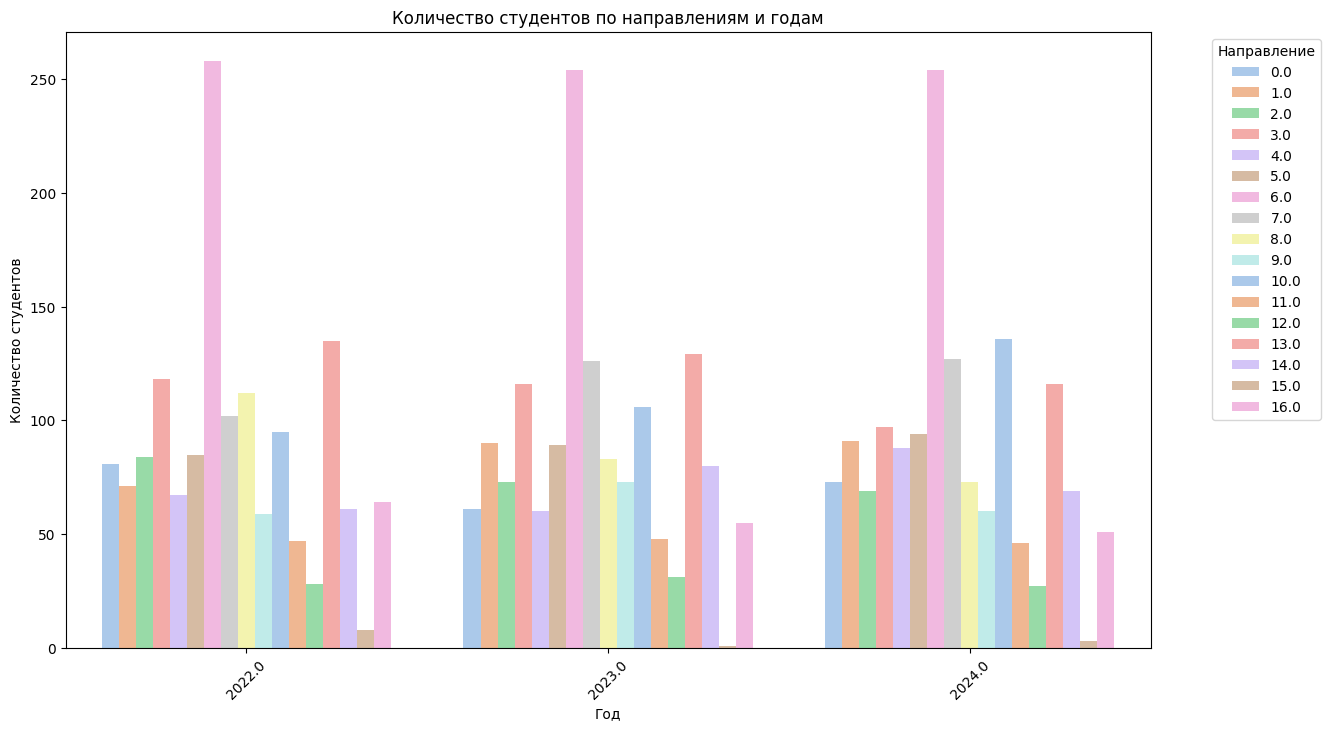

In [11]:
count_df = final_df.groupby(['Год', 'Направление']).size().reset_index(name='Количество')
# Визуализация результатов
plt.figure(figsize=(14, 8))
sns.barplot(x='Год', y='Количество', hue='Направление', data=count_df, palette='pastel')
plt.title('Количество студентов по направлениям и годам')
plt.xlabel('Год')
plt.ylabel('Количество студентов')
plt.legend(title='Направление', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Поворот меток на оси X для удобства чтения
plt.show()

In [443]:
# Подсчет общего количества студентов по годам
total_students_per_year = final_df['Год'].value_counts()
total_students_per_year

Год
2022.0    1475
2023.0    1475
2024.0    1474
Name: count, dtype: int64

In [9]:
# Добавление колонок
final_df['Уровень безработицы'] = new_df['Уровень безработицы']
final_df['Уровень инфляции'] = new_df['Уровень инфляции']
final_df['Вступительный балл'] = new_df['Вступительный балл']
final_df['Пол'] = new_df['Пол']
final_df['Образовательные специальные потребности'] = new_df['Образовательные специальные потребности']
final_df['Дневная/вечерняя форма обучения'] = new_df['Дневная/вечерняя форма обучения']
final_df['Предыдущее образование (оценка)'] = new_df['Предыдущее образование (оценка)']
final_df['Перемещенный'] = new_df['Перемещенный']
final_df['Возраст при зачислении'] = new_df['Возраст при зачислении']
final_df['Международный статус'] = new_df['Международный статус']
final_df['ВВП'] = new_df['ВВП']
final_df

,Год,Направление,Уровень безработицы,Уровень инфляции,Вступительный балл,Пол,Образовательные специальные потребности,Дневная/вечерняя форма обучения,Предыдущее образование (оценка),Перемещенный,Возраст при зачислении,Международный статус,ВВП
0,2022.0,0.0,10.8,1.4,127.3,1,0,1,122.0,1,20,0,1.74
1,2023.0,1.0,13.9,-0.3,142.5,1,0,1,160.0,1,19,0,0.79
2,2024.0,2.0,10.8,1.4,124.8,1,0,1,122.0,1,19,0,1.74
3,2022.0,3.0,9.4,-0.8,119.6,0,0,1,122.0,1,20,0,-3.12
4,2023.0,4.0,13.9,-0.3,141.5,0,0,0,100.0,0,45,0,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,2022.0,3.0,15.5,2.8,122.2,1,0,1,125.0,0,19,0,-4.06
4420,2023.0,3.0,11.1,0.6,119.0,0,0,1,120.0,1,18,1,2.02
4421,2024.0,6.0,13.9,-0.3,149.5,0,0,1,154.0,1,30,0,0.79
4422,2022.0,13.0,9.4,-0.8,153.8,0,0,1,180.0,1,20,0,-3.12


Проверка данных

In [445]:
# Проверка на отсутствие пропущенных значений
missing_values = final_df.isnull().sum()
print("Пропущенные значения в каждой колонке:")
missing_values

Пропущенные значения в каждой колонке:


Год                                        0
Направление                                0
Уровень безработицы                        0
Уровень инфляции                           0
Вступительный балл                         0
Пол                                        0
Образовательные специальные потребности    0
Дневная/вечерняя форма обучения            0
Предыдущее образование (оценка)            0
Перемещенный                               0
Возраст при зачислении                     0
Международный статус                       0
ВВП                                        0
dtype: int64

In [446]:
# Проверка уникальных значений в каждой колонке
unique_values = df.nunique()
print("\nУникальные значения в каждой колонке:")
unique_values


Уникальные значения в каждой колонке:


Режим подачи заявки                         18
Порядок подачи заявки                        8
Направление                                 17
Дневная/вечерняя форма обучения              2
Предыдущее образование                      17
Предыдущее образование (оценка)            101
Вступительный балл                         620
Перемещенный                                 2
Образовательные специальные потребности      2
Пол                                          2
Возраст при зачислении                      46
Получатель стипендии                         2
Международный статус                         2
Уровень безработицы                         10
Уровень инфляции                             9
ВВП                                         10
Направление_код                             17
Год                                          3
dtype: int64

In [10]:
# Проверка на дублирующиеся строки
duplicate_rows = final_df.duplicated().sum()

if duplicate_rows > 0:
    print(f"\nКоличество дублирующихся строк: {duplicate_rows}")
    # Удаление дублирующихся строк
    final_df.drop_duplicates(inplace=True)
    
    # Количество строк после удаления дубликатов
    print(f"Количество удаленных дублирующихся строк: {duplicate_rows}")
    print(f"Количество строк после удаления дубликатов: {len(final_df)}")
else:
    print("\nДубликатов нет.")


Количество дублирующихся строк: 9
Количество удаленных дублирующихся строк: 9
Количество строк после удаления дубликатов: 4415


In [17]:
# Статистический анализ данных
description = final_df.describe()
print("\nСтатистический анализ данных:")
print(description)


Статистический анализ данных:
               Год  Направление  Уровень безработицы  Уровень инфляции  \
count  4415.000000  4415.000000          4415.000000       4415.000000   
mean   2022.999547     7.138165            11.563171          1.227860   
std       0.816404     4.286725             2.663770          1.382568   
min    2022.000000     0.000000             7.600000         -0.800000   
25%    2022.000000     4.000000             9.400000          0.300000   
50%    2023.000000     6.000000            11.100000          1.400000   
75%    2024.000000    10.000000            13.900000          2.600000   
max    2024.000000    16.000000            16.200000          3.700000   

       Вступительный балл          Пол  \
count         4415.000000  4415.000000   
mean           126.967112     0.352208   
std             14.474269     0.477713   
min             95.000000     0.000000   
25%            117.900000     0.000000   
50%            126.100000     0.000000   
75%     

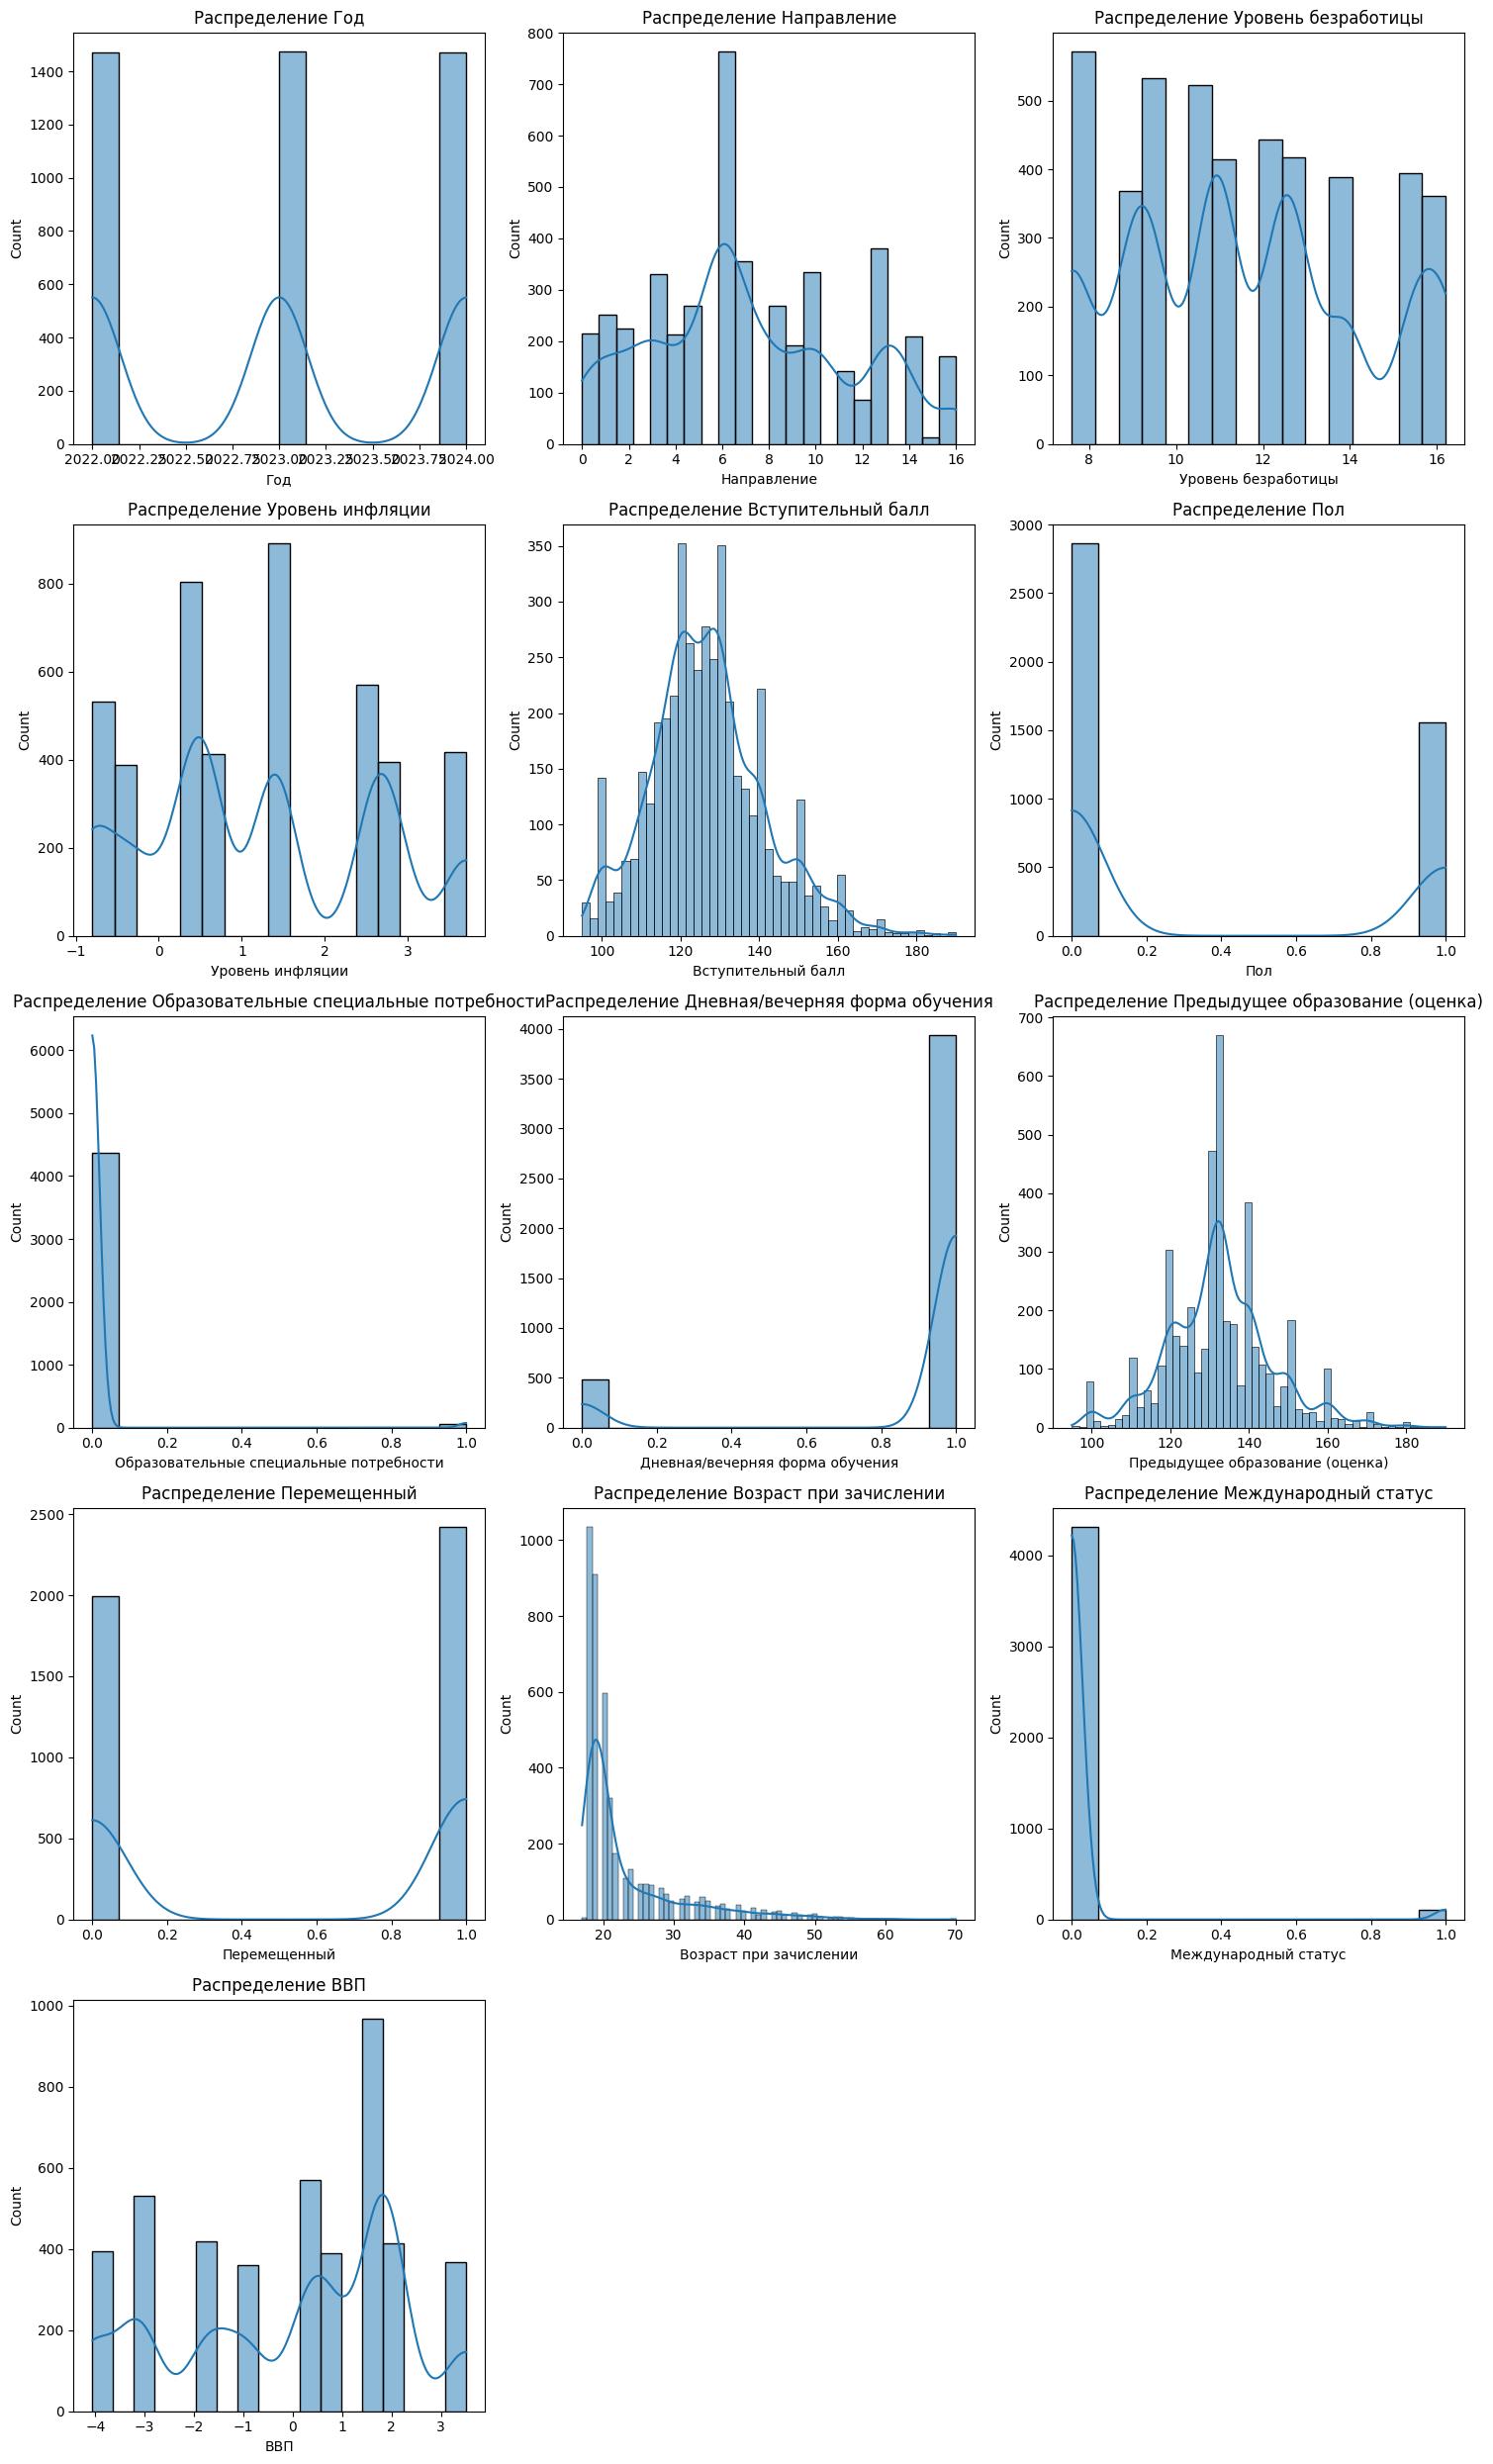

In [204]:
# Определение числовых колонок
numeric_columns = final_df.select_dtypes(include=[np.number]).columns.tolist()

# Определение количества строк и столбцов для подграфиков
num_plots = len(numeric_columns)
num_cols = 3
num_rows = (num_plots // num_cols) + 1 if num_plots % num_cols != 0 else num_plots // num_cols

# Построение графиков
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(final_df[column], kde=True)
    plt.title(f'Распределение {column}')
plt.tight_layout()
plt.show()

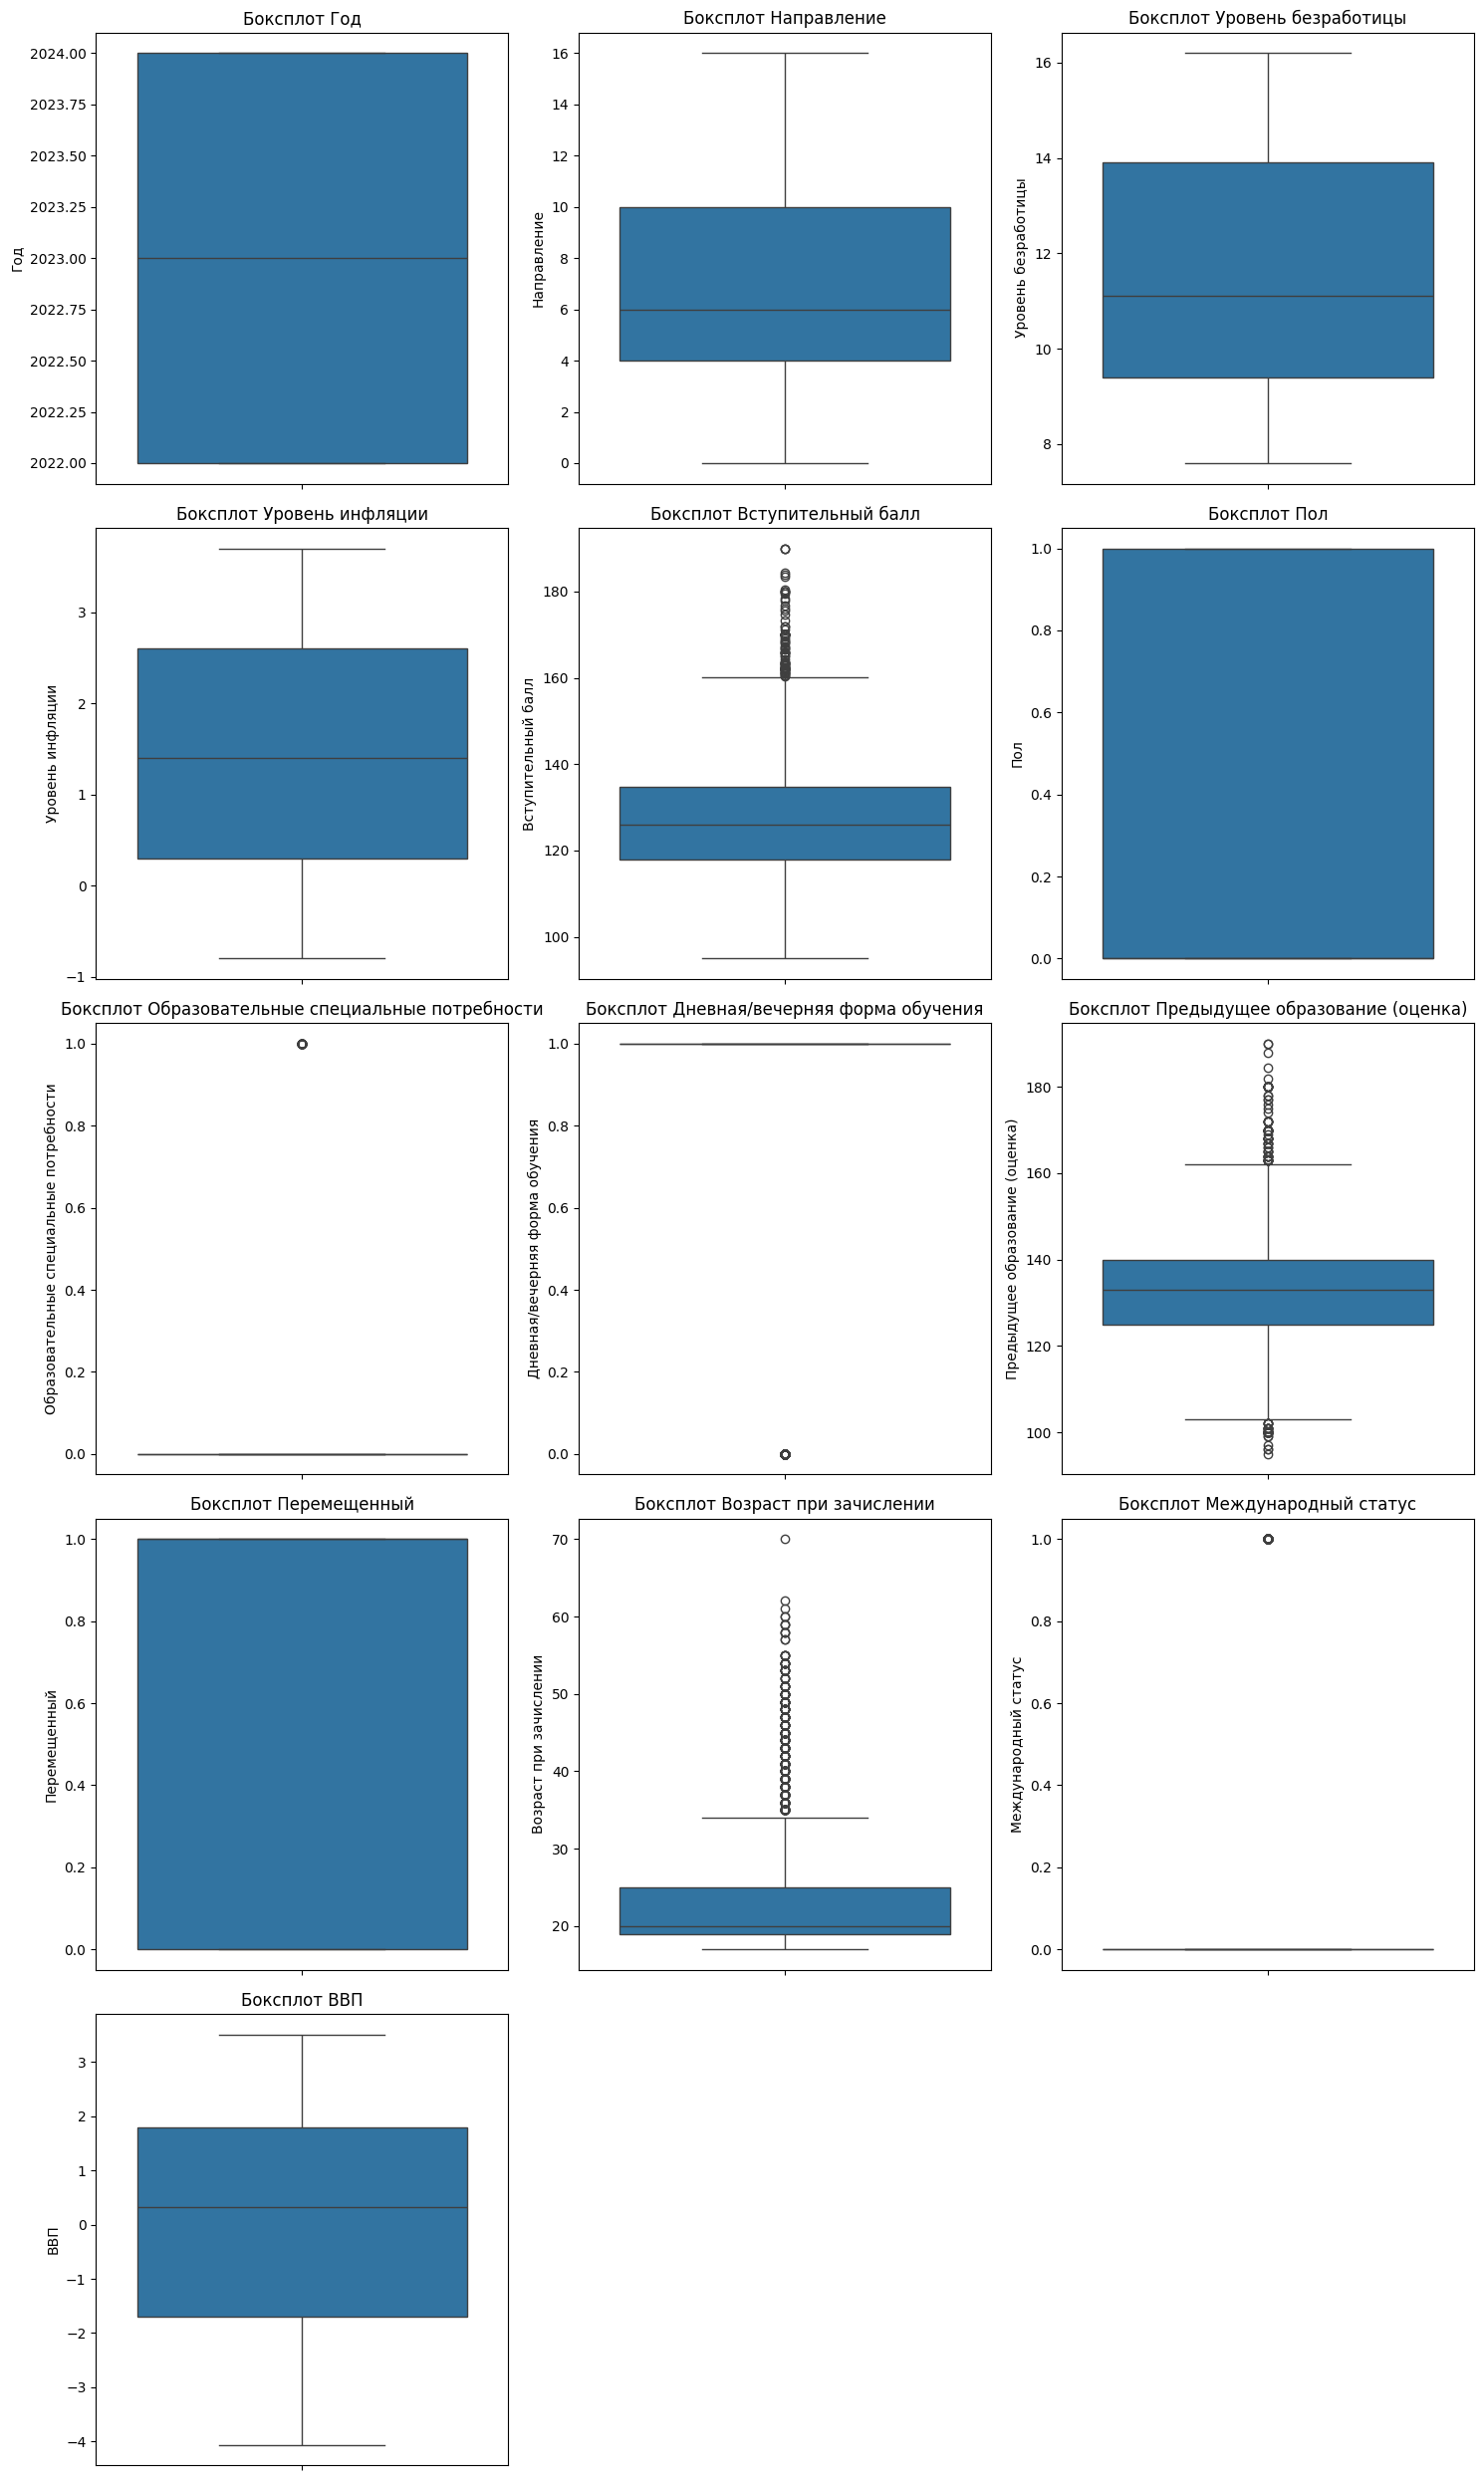

In [19]:
# Боксплоты для выявления выбросов
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=final_df[column])
    plt.title(f'Боксплот {column}')
plt.tight_layout()
plt.show()

c:\Users\1645295\Documents\GitHub\diplom\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\1645295\AppData\Local\Temp\ipykernel_19596\2491605342.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X.values.flatten(), X_sm.values.flatten()],


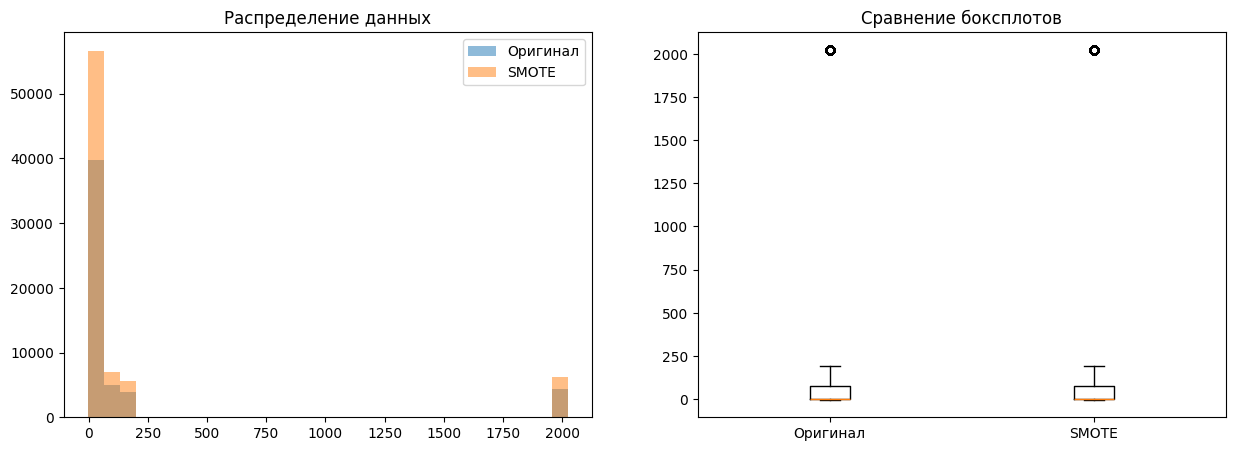

Оригинальное распределение:
Дневная/вечерняя форма обучения
1    3933
0     482
Name: count, dtype: int64

Новое распределение после SMOTE:
Дневная/вечерняя форма обучения
1    3933
0    2359
Name: count, dtype: int64

Статистика оригинальных данных: {'mean': np.float64(193.89218403171012), 'median': np.float64(193.50166666666667), 'std': np.float64(3.992601895763974)}
Статистика SMOTE данных: {'mean': np.float64(193.95818790880898), 'median': np.float64(193.485), 'std': np.float64(4.109983897167136)}
T-тест: статистика=-0.021041473915708882, p-value=0.983212604264293


In [11]:
from imblearn.over_sampling import SMOTE
from scipy import stats

def validate_smote(original_data, target_column): 
    # Подготовка данных для SMOTE 
    X = original_data.drop(columns=[target_column]) 
    y = original_data[target_column] 
 
    # Создание объекта SMOTE 
    smote = SMOTE(sampling_strategy={0: 2359, 1: 3933}, random_state=42) 
 
    # Применение SMOTE к данным 
    X_sm, y_sm = smote.fit_resample(X, y) 
 
    # Статистический анализ 
    original_stats = { 
        'mean': X.mean().mean(), 
        'median': X.median().mean(), 
        'std': X.std().mean()
    } 
         
    synthetic_stats = { 
        'mean': X_sm.mean().mean(), 
        'median': X_sm.median().mean(), 
        'std': X_sm.std().mean()
    } 

    # Визуализация
    plt.figure(figsize=(15,5)) 
    plt.subplot(121) 
    plt.hist(X.values.flatten(), bins=30, alpha=0.5, label='Оригинал') 
    plt.hist(X_sm.values.flatten(), bins=30, alpha=0.5, label='SMOTE') 
    plt.legend() 
    plt.title('Распределение данных') 
 
    plt.subplot(122) 
    plt.boxplot([X.values.flatten(), X_sm.values.flatten()], 
                labels=['Оригинал', 'SMOTE']) 
    plt.title('Сравнение боксплотов') 
    plt.show() 

    # Распределение классов
    print("Оригинальное распределение:")
    print(y.value_counts())
    print("\nНовое распределение после SMOTE:")
    print(y_sm.value_counts())
 
    # Статистический тест 
    t_test = stats.ttest_ind(X.values.flatten(), X_sm.values.flatten()) 
         
    print("\nСтатистика оригинальных данных:", original_stats) 
    print("Статистика SMOTE данных:", synthetic_stats) 
    print(f"T-тест: статистика={t_test.statistic}, p-value={t_test.pvalue}") 

    # Воссоздание DataFrame
    balanced_df = pd.concat([
        pd.DataFrame(X_sm, columns=X.columns), 
        pd.Series(y_sm, name=target_column)
    ], axis=1)

    return balanced_df

# Вызов функции
ex_df = validate_smote(final_df, 'Дневная/вечерняя форма обучения')


c:\Users\1645295\Documents\GitHub\diplom\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\1645295\AppData\Local\Temp\ipykernel_19596\2869329959.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X.values.flatten(), X_sm.values.flatten()],


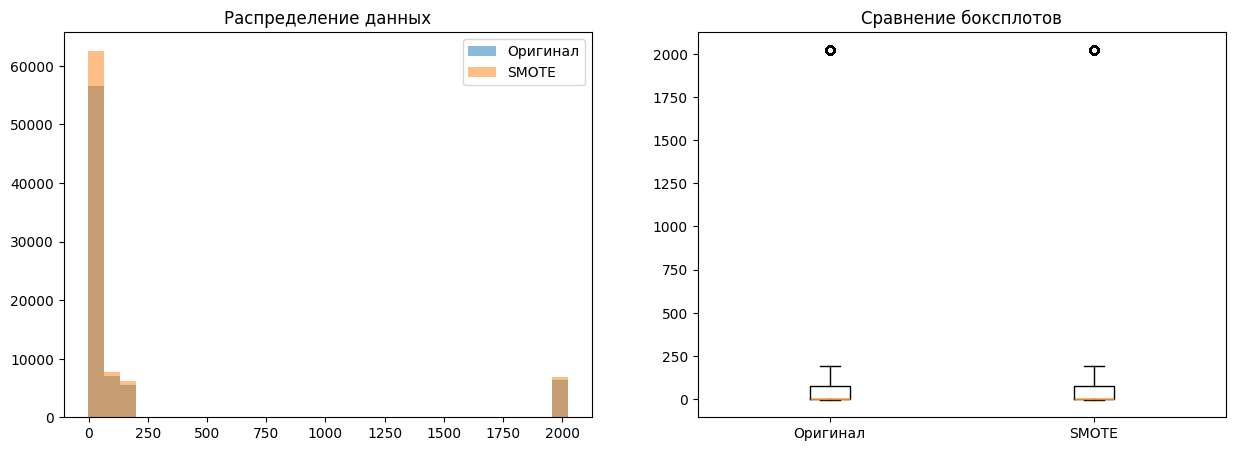

Оригинальное распределение:
Пол
0    4440
1    1852
Name: count, dtype: int64

Новое распределение после SMOTE:
Пол
0    4440
1    2517
Name: count, dtype: int64

Статистика оригинальных данных: {'mean': np.float64(193.9857493625068), 'median': np.float64(193.56833333333336), 'std': np.float64(4.112347083053911)}
Статистика SMOTE данных: {'mean': np.float64(193.98241622079345), 'median': np.float64(193.57666666666668), 'std': np.float64(4.113769390899684)}
T-тест: статистика=0.0011991214078146879, p-value=0.9990432412759356


In [12]:
def validate_smote(original_data, target_column): 
    # Подготовка данных для SMOTE 
    X = original_data.drop(columns=[target_column]) 
    y = original_data[target_column] 
 
    # Создание объекта SMOTE 
    smote = SMOTE(sampling_strategy={0: 4440, 1: 2517}, random_state=42) 
 
    # Применение SMOTE к данным 
    X_sm, y_sm = smote.fit_resample(X, y) 
 
    # Статистический анализ 
    original_stats = { 
        'mean': X.mean().mean(), 
        'median': X.median().mean(), 
        'std': X.std().mean()
    } 
         
    synthetic_stats = { 
        'mean': X_sm.mean().mean(), 
        'median': X_sm.median().mean(), 
        'std': X_sm.std().mean()
    } 

    # Визуализация
    plt.figure(figsize=(15,5)) 
    plt.subplot(121) 
    plt.hist(X.values.flatten(), bins=30, alpha=0.5, label='Оригинал') 
    plt.hist(X_sm.values.flatten(), bins=30, alpha=0.5, label='SMOTE') 
    plt.legend() 
    plt.title('Распределение данных') 
 
    plt.subplot(122) 
    plt.boxplot([X.values.flatten(), X_sm.values.flatten()], 
                labels=['Оригинал', 'SMOTE']) 
    plt.title('Сравнение боксплотов') 
    plt.show() 

    # Распределение классов
    print("Оригинальное распределение:")
    print(y.value_counts())
    print("\nНовое распределение после SMOTE:")
    print(y_sm.value_counts())
 
    # Статистический тест 
    t_test = stats.ttest_ind(X.values.flatten(), X_sm.values.flatten()) 
         
    print("\nСтатистика оригинальных данных:", original_stats) 
    print("Статистика SMOTE данных:", synthetic_stats) 
    print(f"T-тест: статистика={t_test.statistic}, p-value={t_test.pvalue}") 

    # Воссоздание DataFrame
    balanced_df = pd.concat([
        pd.DataFrame(X_sm, columns=X.columns), 
        pd.Series(y_sm, name=target_column)
    ], axis=1)

    return balanced_df

# Вызов функции
df = validate_smote(ex_df, 'Пол')


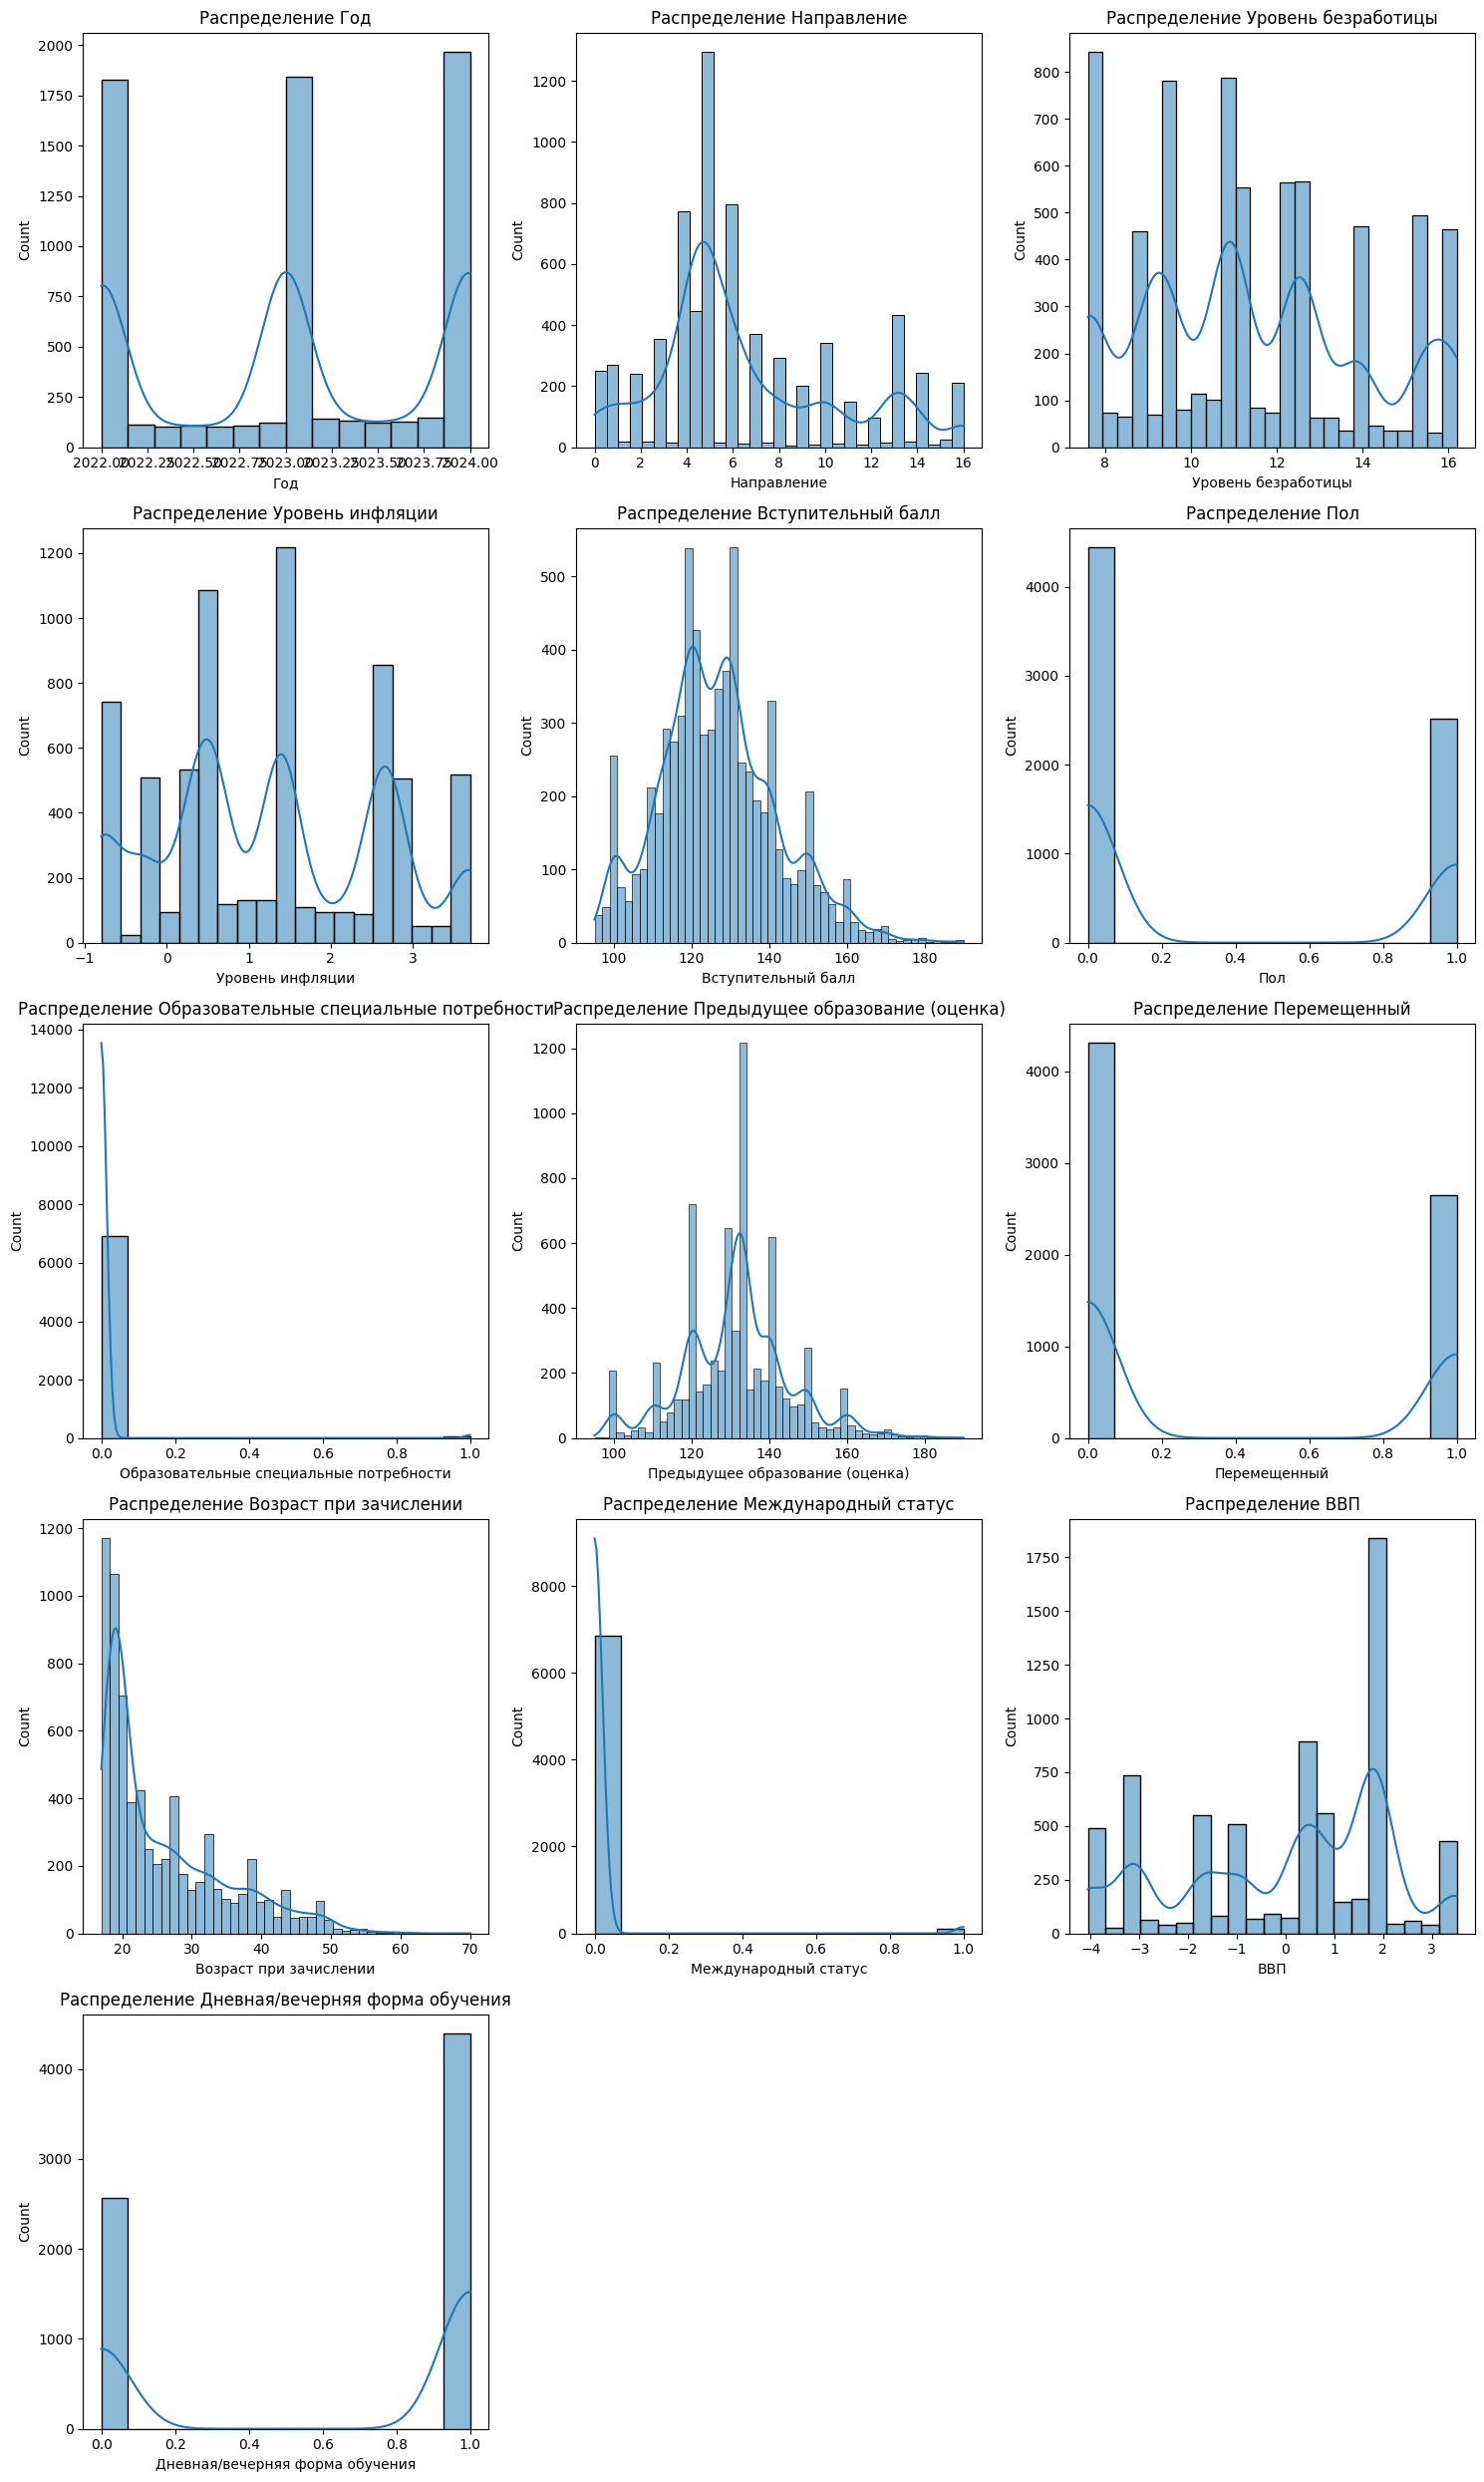

In [703]:
# Определение количества строк и столбцов для подграфиков
num_plots = len(numeric_columns)
num_cols = 3
num_rows = (num_plots // num_cols) + 1 if num_plots % num_cols != 0 else num_plots // num_cols

# Построение графиков
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Распределение {column}')
plt.tight_layout()
plt.show()

In [13]:
# Округление значений
columns_to_round = ['Направление', 'Год']
df[columns_to_round] = df[columns_to_round].round()
df

,Год,Направление,Уровень безработицы,Уровень инфляции,Вступительный балл,Образовательные специальные потребности,Предыдущее образование (оценка),Перемещенный,Возраст при зачислении,Международный статус,ВВП,Дневная/вечерняя форма обучения,Пол
0,2022.0,0.0,10.800000,1.4,127.300000,0,122.000000,1,20,0,1.740000,1,1
1,2023.0,1.0,13.900000,-0.3,142.500000,0,160.000000,1,19,0,0.790000,1,1
2,2024.0,2.0,10.800000,1.4,124.800000,0,122.000000,1,19,0,1.740000,1,1
3,2022.0,3.0,9.400000,-0.8,119.600000,0,122.000000,1,20,0,-3.120000,1,0
4,2023.0,4.0,13.900000,-0.3,141.500000,0,100.000000,0,45,0,0.790000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,2023.0,10.0,8.959474,1.4,138.253047,0,133.128172,1,24,0,3.454595,1,1
6953,2022.0,7.0,12.700000,3.7,140.171825,0,151.074920,0,19,0,-1.700000,1,1
6954,2023.0,16.0,7.600000,2.6,121.826189,0,129.000000,1,19,0,0.320000,1,1
6955,2022.0,0.0,9.400000,-0.8,127.843096,0,129.142640,0,19,0,-3.120000,1,1


In [14]:
df['Направление'].value_counts()

Направление
5.0     1429
4.0     1098
6.0      809
13.0     445
7.0      385
3.0      366
10.0     349
8.0      304
1.0      287
14.0     262
2.0      259
0.0      251
16.0     210
9.0      207
11.0     160
12.0     106
15.0      30
Name: count, dtype: int64

In [15]:
THRESHOLD = 750          # Максимальное количество записей на направление
MIN_RARE = 100           # Минимальное количество для редких направлений
EXEMPT_DIRECTIONS = [15,12,11] # Направления, которые не будем сокращать

# Сбор индексов для удаления
indices_to_drop = []
direction_counts = df['Направление'].value_counts()

for direction, group in df.groupby('Направление'):
    count = len(group)
    
    # Для основных направлений: сокращаем до THRESHOLD
    if count > THRESHOLD and direction not in EXEMPT_DIRECTIONS:
        deleted_indices = group.sample(n=count - THRESHOLD, random_state=42).index
        indices_to_drop.extend(deleted_indices)

# Удаление записей
deleted_records = df.loc[indices_to_drop]
df_balanced = df.drop(indices_to_drop).reset_index(drop=True)
direction_counts = df_balanced['Направление'].value_counts()

# Приоритетное добавление для направления 15.0 
if 15 in EXEMPT_DIRECTIONS:
    needed = MIN_RARE - len(df_balanced[df_balanced['Направление'] == 15])
    if needed > 0 and len(deleted_records) >= needed:
        # Добавляем записи к направлению 15.0
        to_add = deleted_records.sample(n=needed, replace=False, random_state=42)
        to_add['Направление'] = 15
        df_balanced = pd.concat([df_balanced, to_add])
        deleted_records = deleted_records.drop(to_add.index)
    elif needed > 0:
        print(f"Недостаточно записей для направления 15.0. Требуется: {needed}, доступно: {len(deleted_records)}")

# Перераспределение оставшихся записей
if len(deleted_records) > 0:
    valid_directions = direction_counts[
        (direction_counts.index.isin(EXEMPT_DIRECTIONS)) | 
        (direction_counts > THRESHOLD)
    ].index

    weights = direction_counts[direction_counts.index.isin(valid_directions)]
    weights = weights / weights.sum()

    # Распределяем записи
    num_to_add = len(deleted_records)
    add_counts = (weights * num_to_add).round().astype(int)

    # Корректируем сумму распределения
    while add_counts.sum() != num_to_add:
        diff = num_to_add - add_counts.sum()
        adjust_idx = np.argmax(add_counts) if diff > 0 else np.argmin(add_counts)
        add_counts.iloc[adjust_idx] += np.sign(diff)

    for direction, count in add_counts.items():
        if count > 0:
            current_count = len(df_balanced[df_balanced['Направление'] == direction])
            if current_count + count > THRESHOLD and direction not in EXEMPT_DIRECTIONS:
                # Ограничиваем количество добавляемых записей
                count = THRESHOLD - current_count
            if count > 0:
                sample = deleted_records.sample(n=count, replace=False, random_state=42)
                sample['Направление'] = direction
                df_balanced = pd.concat([df_balanced, sample])
                deleted_records = deleted_records.drop(sample.index)

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced['Направление'].value_counts()

Направление
4.0     750
5.0     750
6.0     750
11.0    709
12.0    470
13.0    445
7.0     385
3.0     366
10.0    349
8.0     304
1.0     287
14.0    262
2.0     259
0.0     251
16.0    210
9.0     207
15.0    203
Name: count, dtype: int64

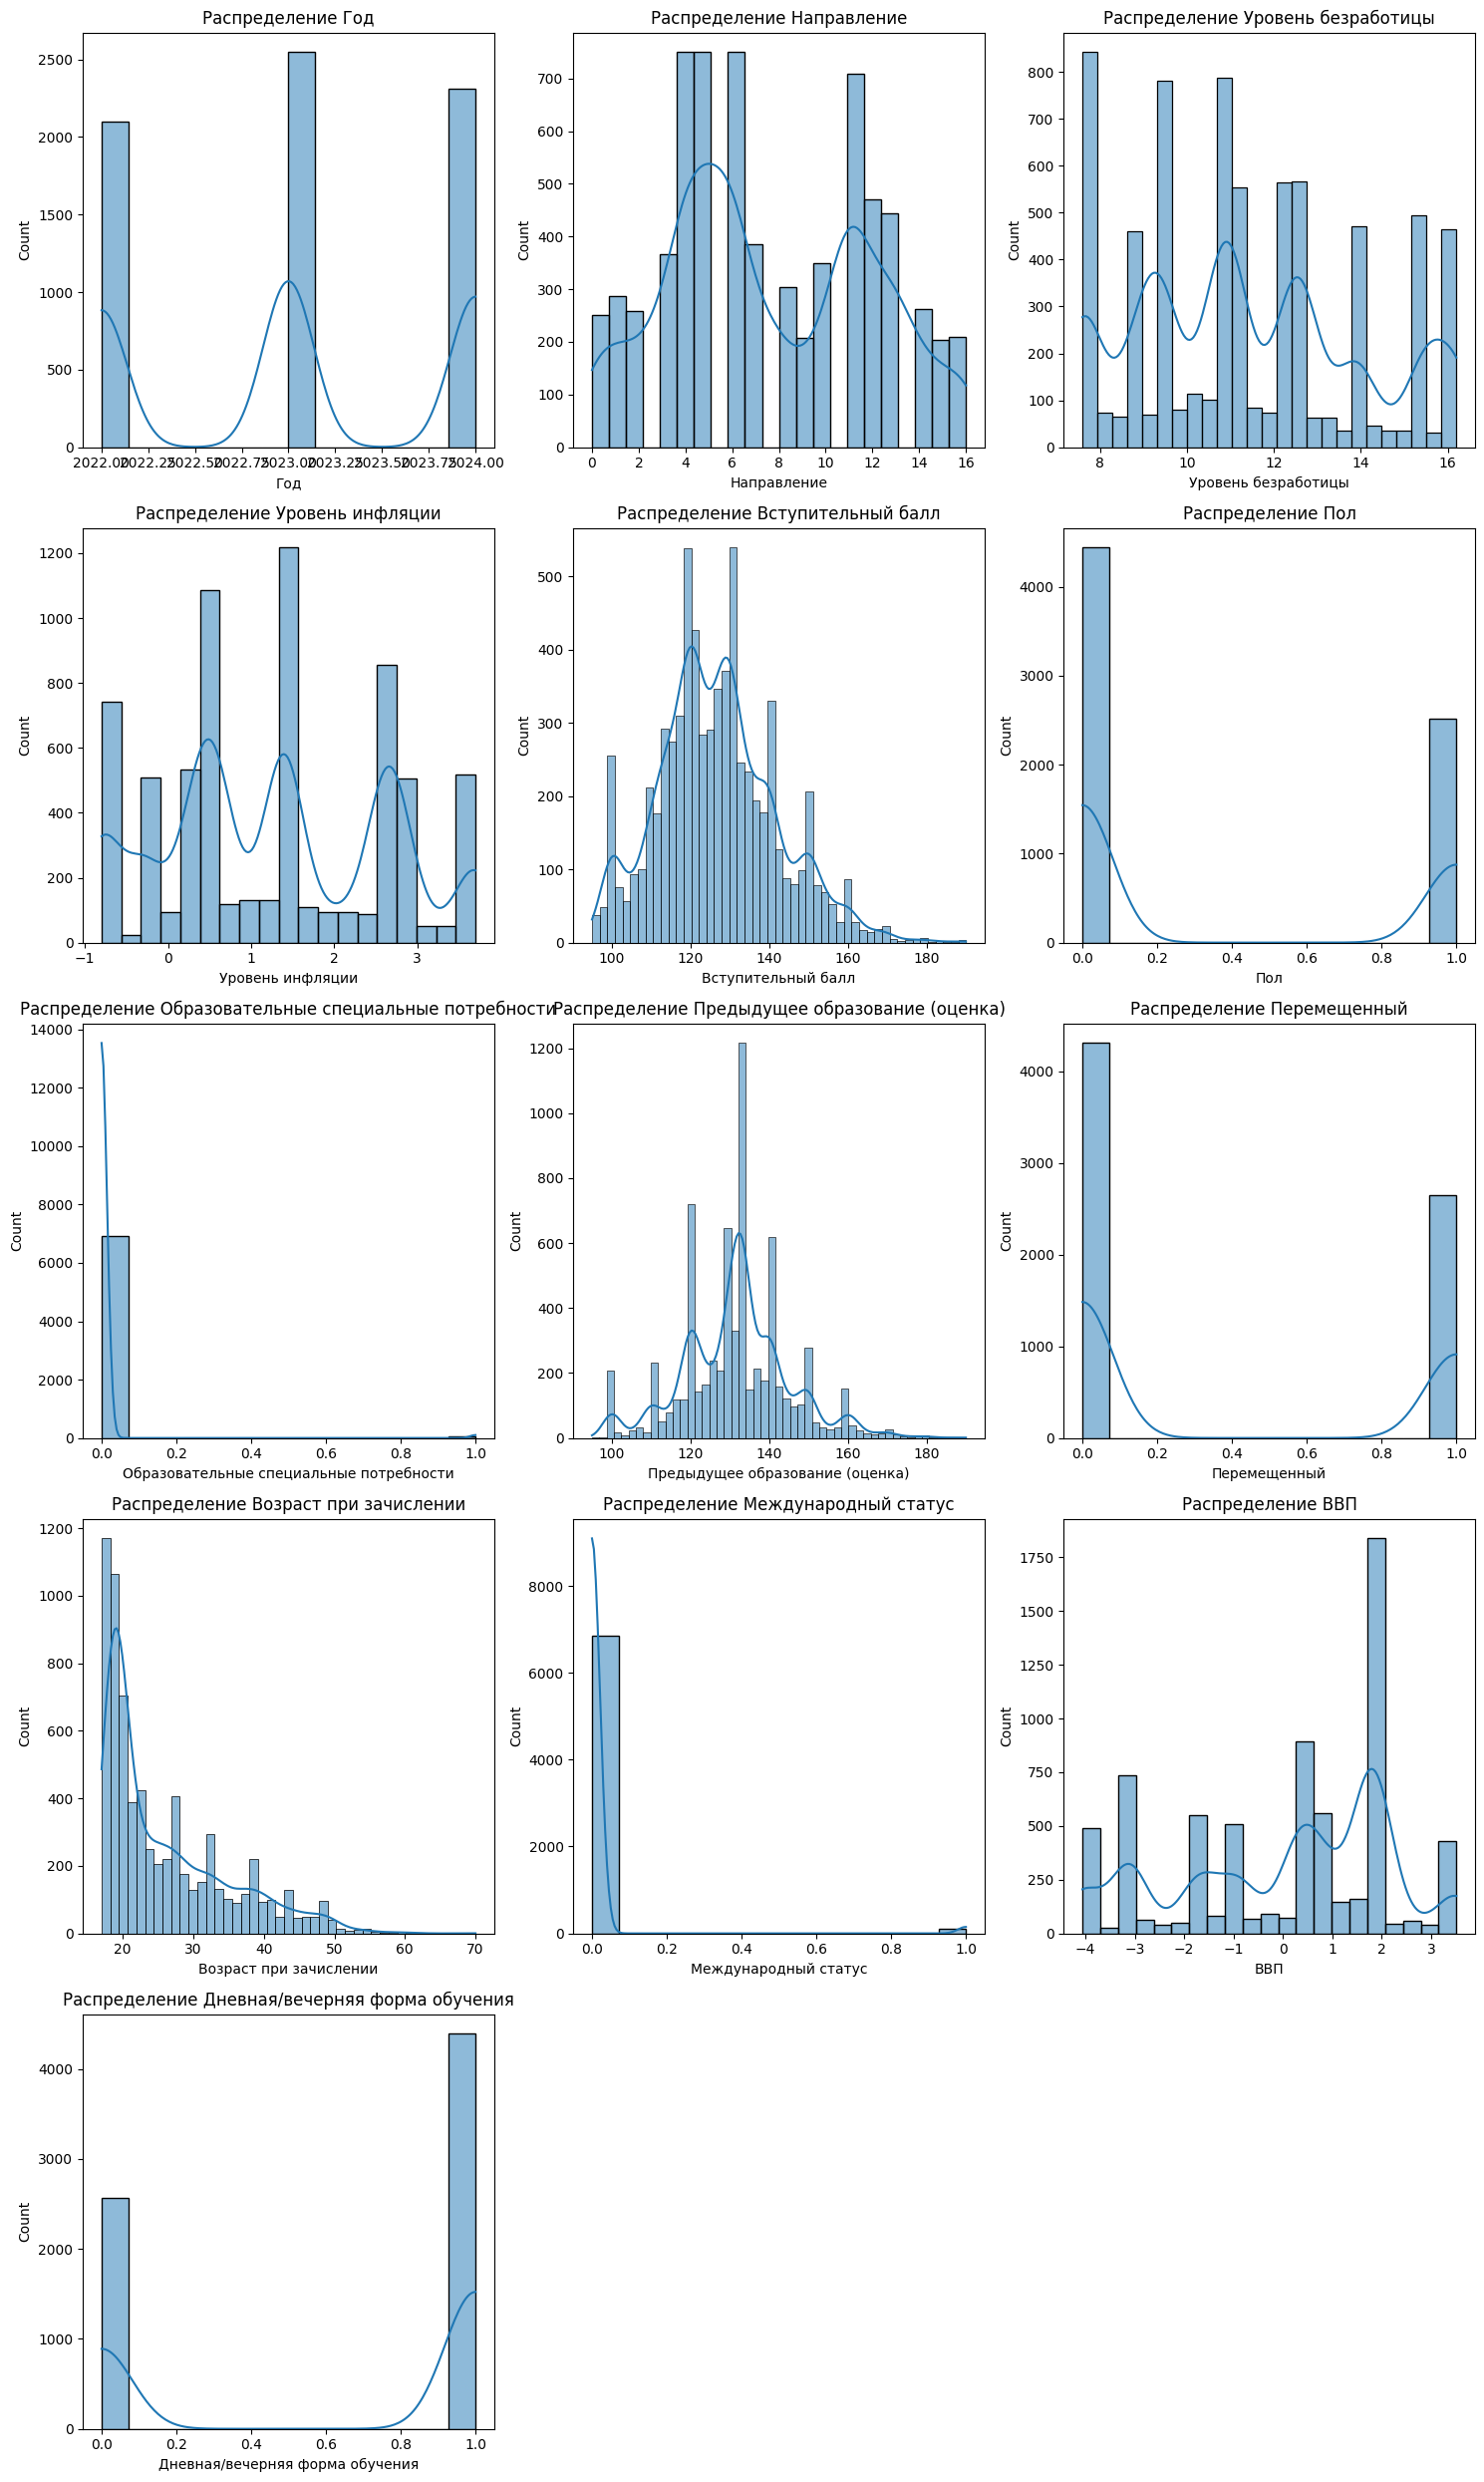

In [777]:
# Определение количества строк и столбцов для подграфиков
num_plots = len(numeric_columns)
num_cols = 3
num_rows = (num_plots // num_cols) + 1 if num_plots % num_cols != 0 else num_plots // num_cols

# Построение графиков
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_balanced[column], kde=True)
    plt.title(f'Распределение {column}')
plt.tight_layout()
plt.show()

In [19]:
df_balanced['Возраст при зачислении'].value_counts()

Возраст при зачислении
18    1165
19    1065
20     704
21     388
24     249
22     242
26     221
27     207
25     206
28     199
23     181
29     175
32     165
31     151
34     132
30     129
33     128
37     118
38     112
39     109
35     102
41      99
40      92
36      89
43      69
44      61
47      49
48      48
46      48
42      48
49      47
45      45
50      41
51      14
53      12
52       9
54       8
55       7
17       5
56       4
58       3
60       3
59       3
57       2
62       1
70       1
61       1
Name: count, dtype: int64

In [26]:
# Балансировка Возраста при зачислении
labels = ['16-20', '21-25', '26-30', '31-36', '37-41', '42-70']
def group_age_quantile(df_balanced, column='Возраст при зачислении', n_groups=6):
    df_result = df_balanced.copy() 
    # Группировка с использованием квантилей
    df_result['Возрастная_группа'] = pd.qcut(
        df_result[column], 
        q=n_groups, 
        labels=labels 
    )

    print(df_result['Возрастная_группа'].value_counts())
    return df_result

example = group_age_quantile(df_balanced)

Возрастная_группа
21-25    1769
31-36    1263
16-20    1170
42-70    1143
37-41     982
26-30     630
Name: count, dtype: int64


In [27]:
# Округление значений в колонке "Предыдущее образование (оценка)"
example['Предыдущее образование (оценка)'] = example['Предыдущее образование (оценка)'].round()
example['Предыдущее образование (оценка)'].value_counts()

Предыдущее образование (оценка)
133.0    1071
120.0     618
130.0     586
140.0     511
150.0     263
         ... 
104.0       1
188.0       1
179.0       1
95.0        1
176.0       1
Name: count, Length: 89, dtype: int64

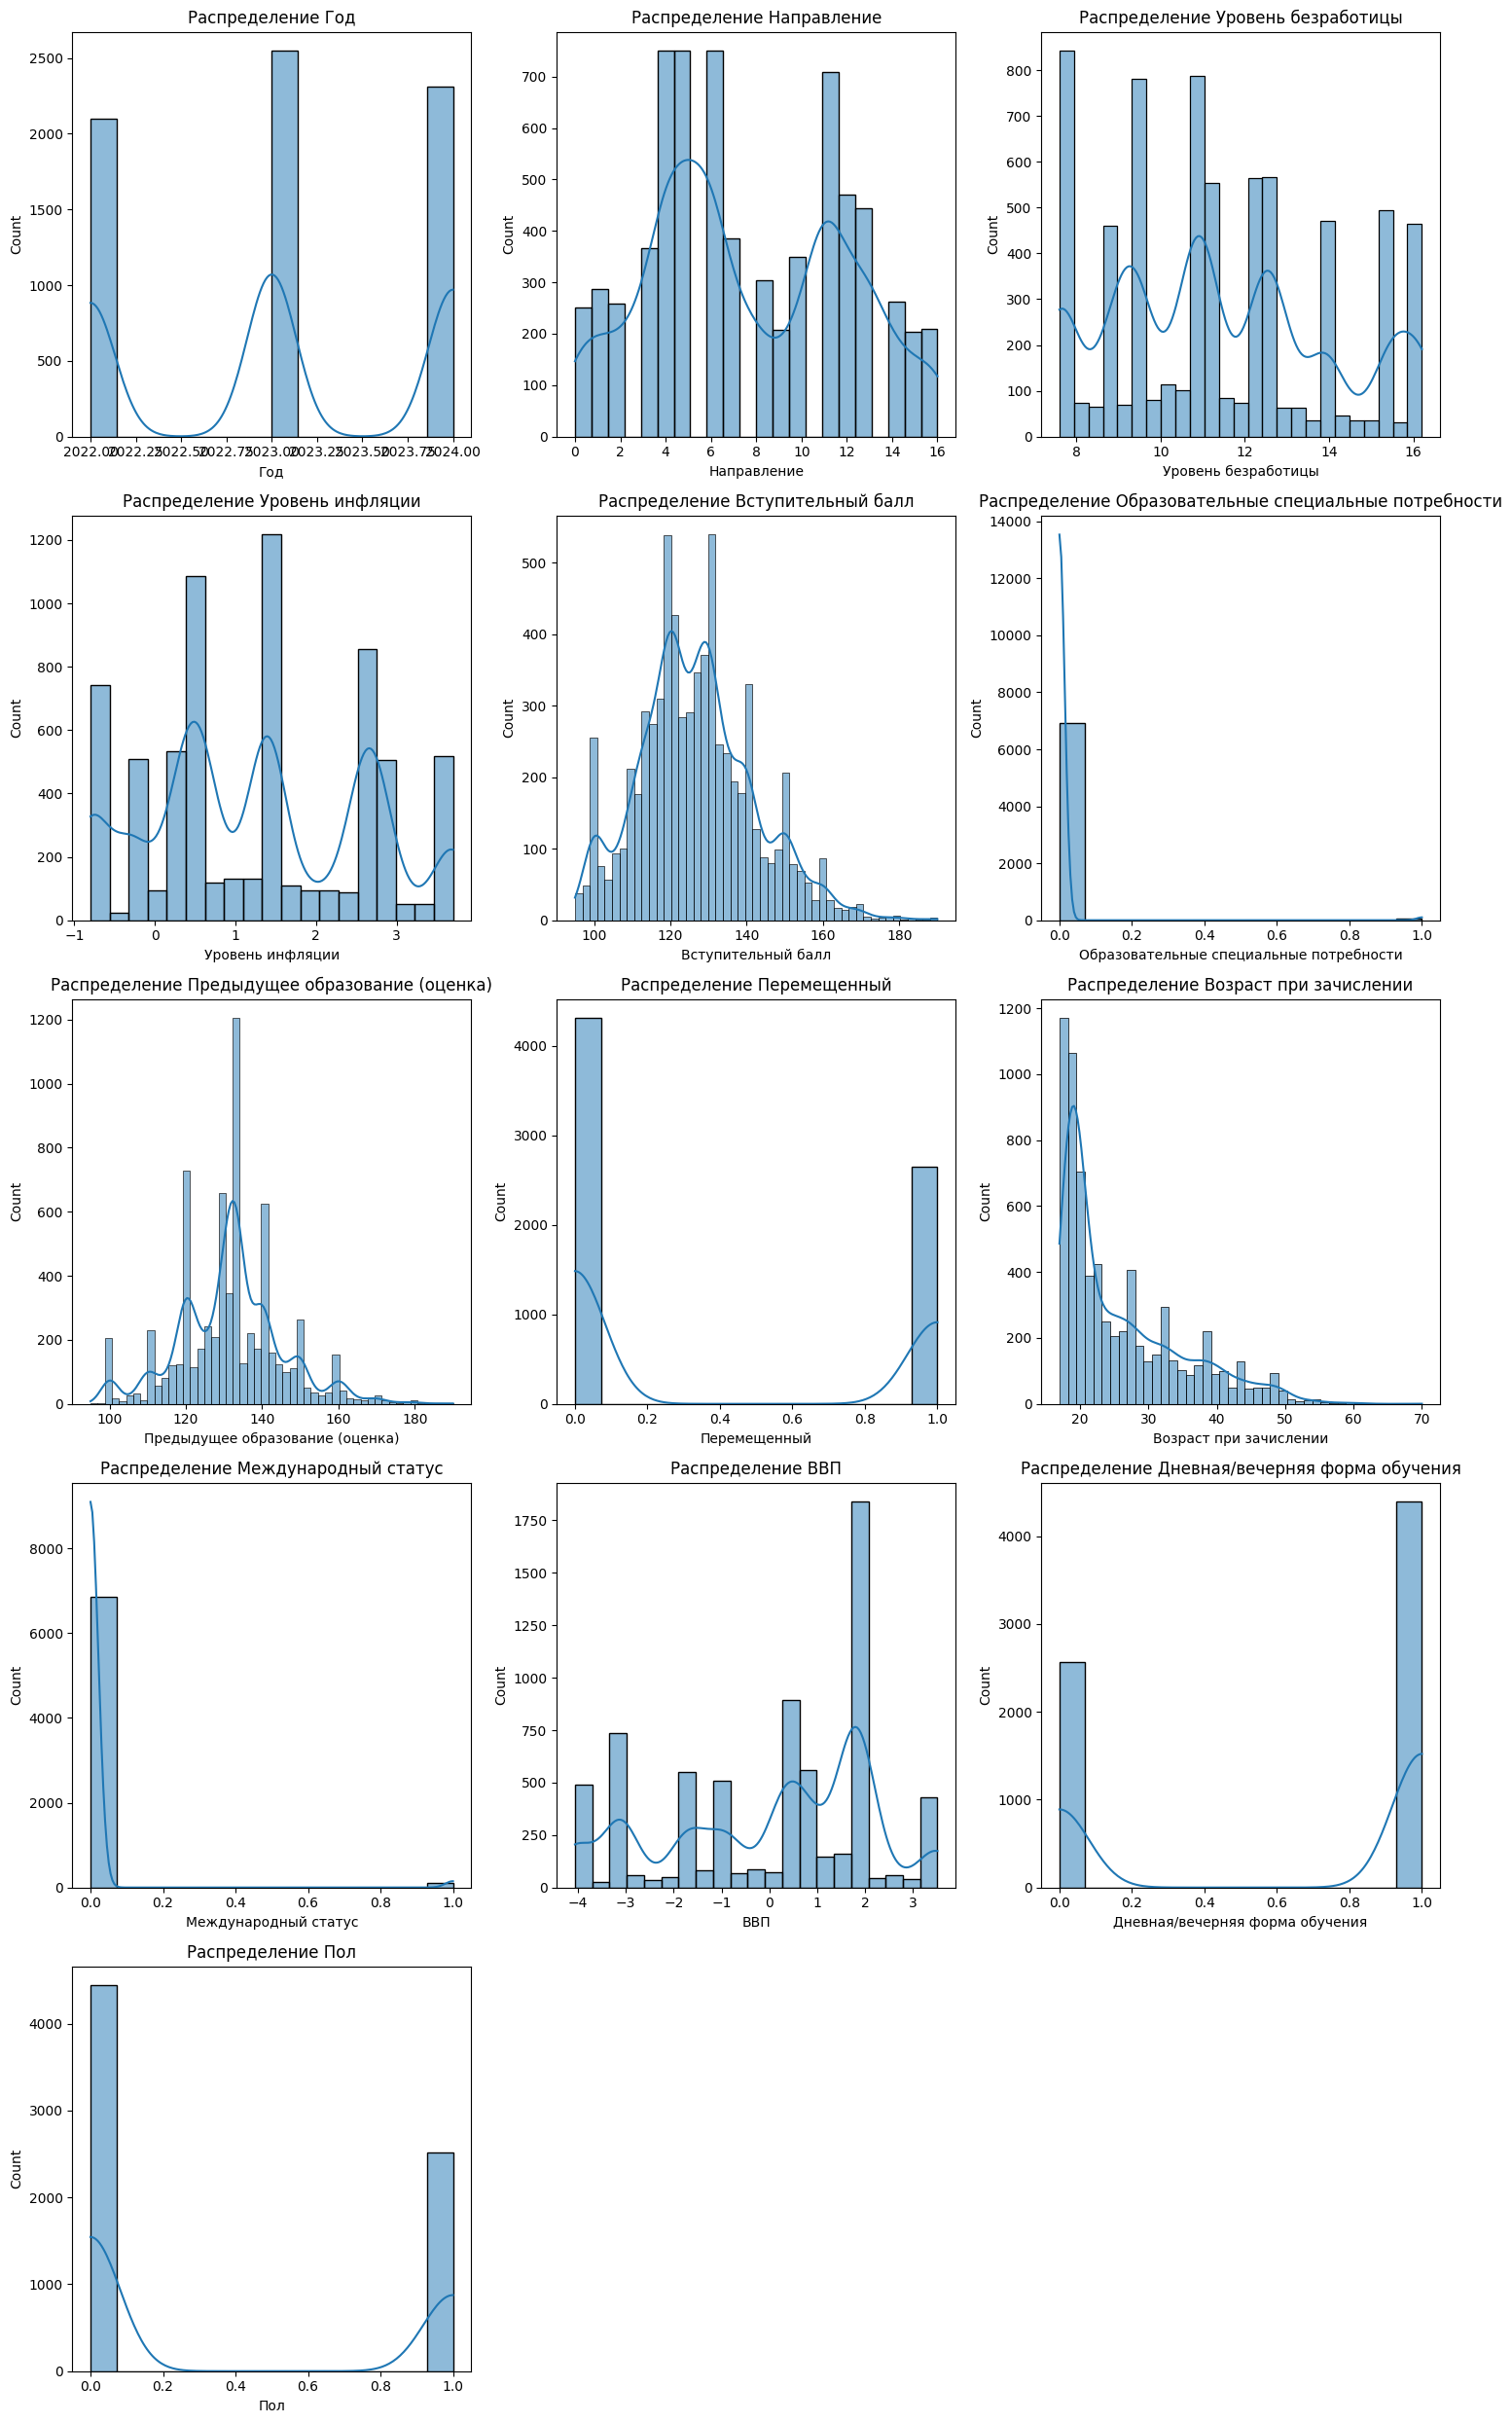

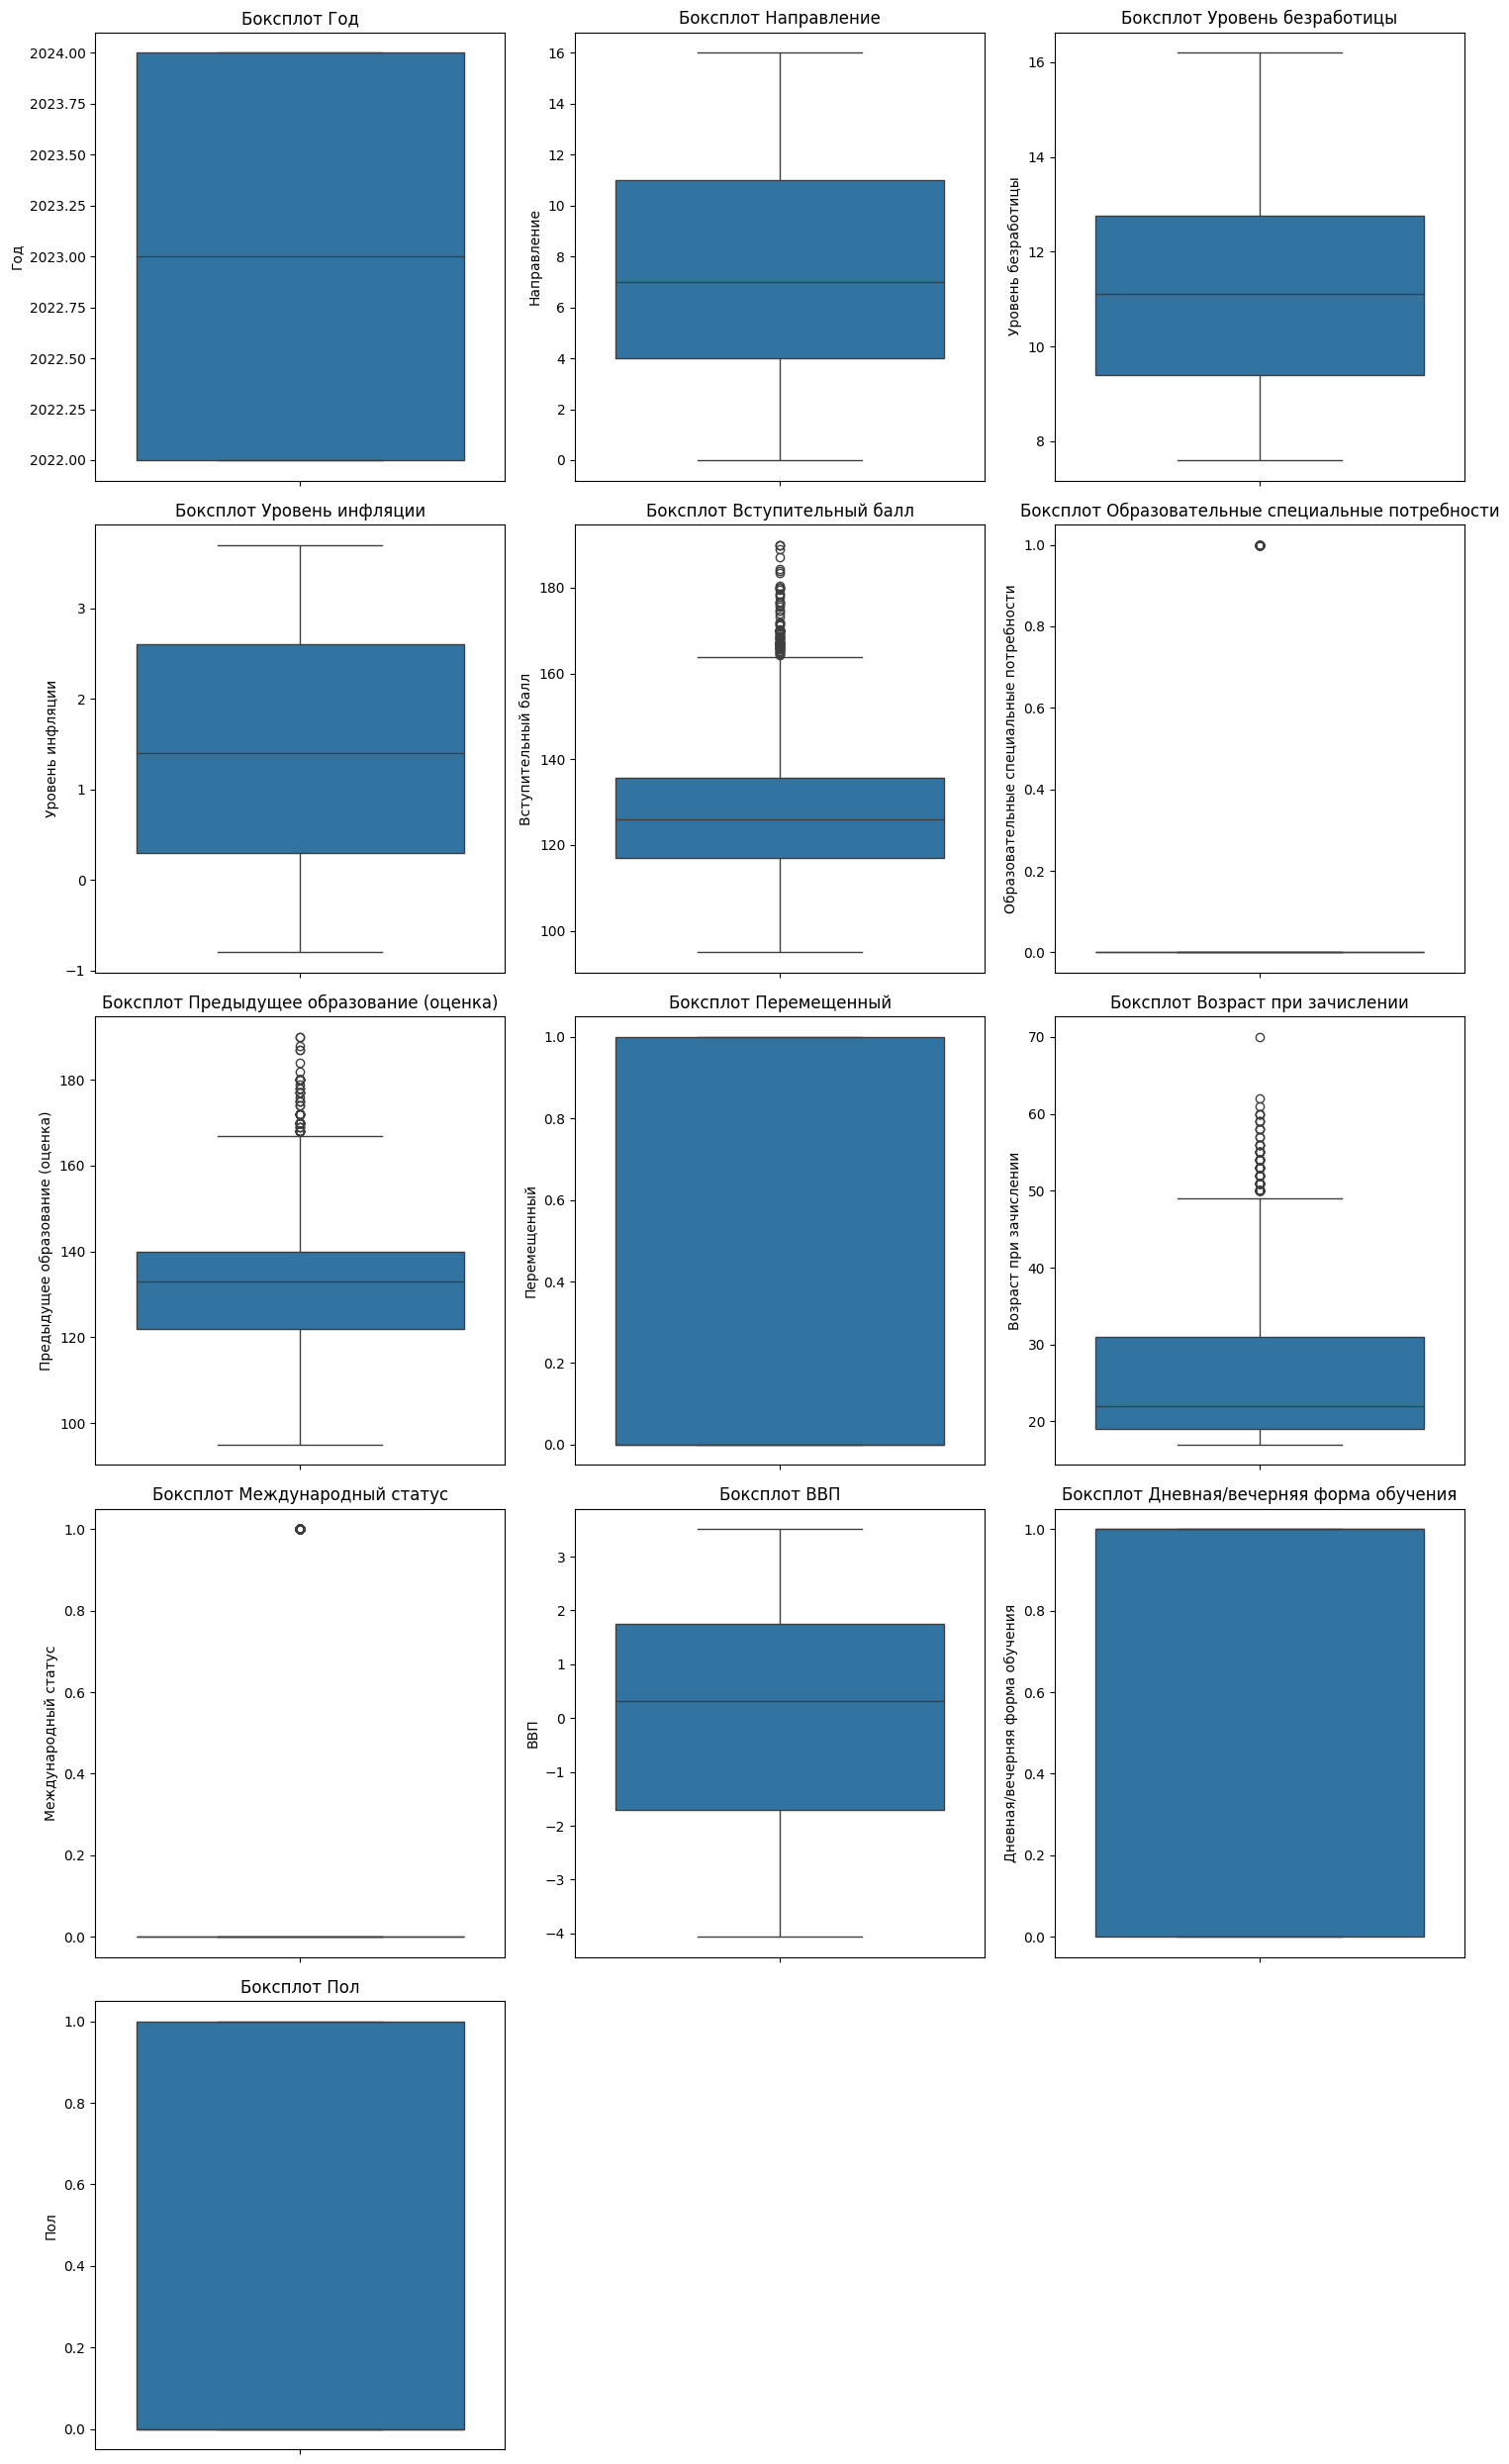

In [29]:
# Определение числовых колонок
numeric_columns = example.select_dtypes(include=[np.number]).columns.tolist()

# Определение количества строк и столбцов для подграфиков
num_plots = len(numeric_columns)
num_cols = 3
num_rows = (num_plots // num_cols) + 1 if num_plots % num_cols != 0 else num_plots // num_cols

# Построение графиков
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(example[column], kde=True)
    plt.title(f'Распределение {column}')
plt.tight_layout()
plt.show()

# Боксплоты для выявления выбросов
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=example[column])
    plt.title(f'Боксплот {column}')
plt.tight_layout()
plt.show()

In [25]:
# Замена выборосов на медиану 
# Определение квартилей и IQR
Q1 = example['Предыдущее образование (оценка)'].quantile(0.25)
Q3 = example['Предыдущее образование (оценка)'].quantile(0.75)
IQR = Q3 - Q1

# Установка пороговых значений
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Вычисление медианы для замены выбросов
median_value = example['Предыдущее образование (оценка)'].median()

# Замена выбросов на медиану
example['Предыдущее образование (оценка)'] = example['Предыдущее образование (оценка)'].mask((example['Предыдущее образование (оценка)'] < lower) | (example['Предыдущее образование (оценка)'] > upper), median_value)

example['Предыдущее образование (оценка)'].value_counts()

Предыдущее образование (оценка)
133.0    1155
120.0     618
130.0     586
140.0     511
150.0     263
         ... 
97.0        2
96.0        2
98.0        1
104.0       1
95.0        1
Name: count, Length: 73, dtype: int64

In [483]:
# Округление значений 
final_df['Вступительный балл'] = final_df['Вступительный балл'].round()
final_df['Вступительный балл'].value_counts()

Вступительный балл
120.0    342
130.0    317
140.0    212
128.0    191
100.0    173
        ... 
177.0      1
175.0      1
171.0      1
172.0      1
173.0      1
Name: count, Length: 86, dtype: int64

In [484]:
# Замена выборосов на медиану в колонке предыдущая оценка

# Определение квартилей и IQR
Q1 = final_df['Вступительный балл'].quantile(0.25)
Q3 = final_df['Вступительный балл'].quantile(0.75)
IQR = Q3 - Q1

# Установка пороговых значений
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Вычисление медианы для замены выбросов
median_value = final_df['Вступительный балл'].median()

# Замена выбросов на медиану
final_df['Вступительный балл'] = final_df['Вступительный балл'].mask((final_df['Вступительный балл'] < lower) | (final_df['Вступительный балл'] > upper), median_value)

final_df['Вступительный балл'].value_counts()

Вступительный балл
120.0    342
130.0    317
126.0    236
140.0    212
128.0    191
        ... 
161.0     11
97.0      11
158.0     11
95.0      11
159.0      9
Name: count, Length: 68, dtype: int64

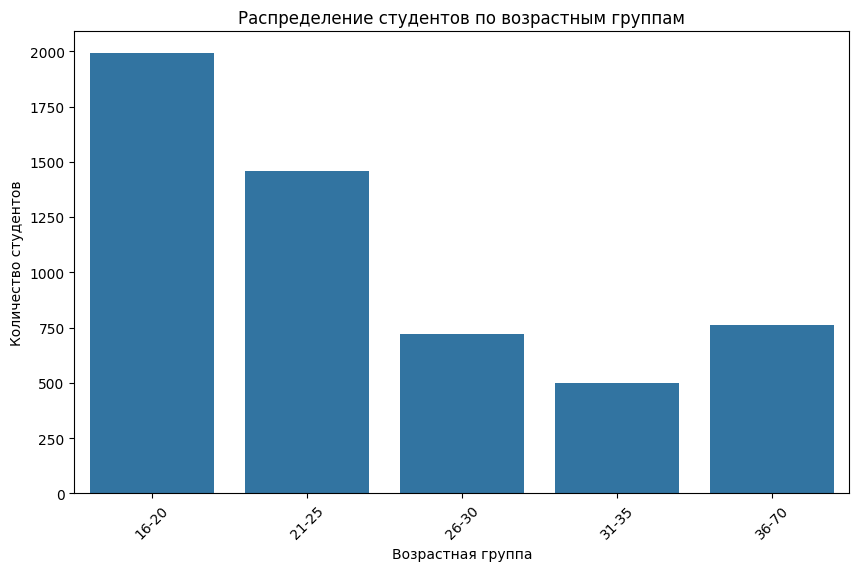

In [485]:
# Проверка уникальности индексов
df1 = final_df.reset_index(drop=True)

# Создание графика распределения
plt.figure(figsize=(10, 6))
sns.countplot(data=final_df, x='Возраст группа')
plt.title('Распределение студентов по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество студентов')
plt.xticks(rotation=45)
plt.show()

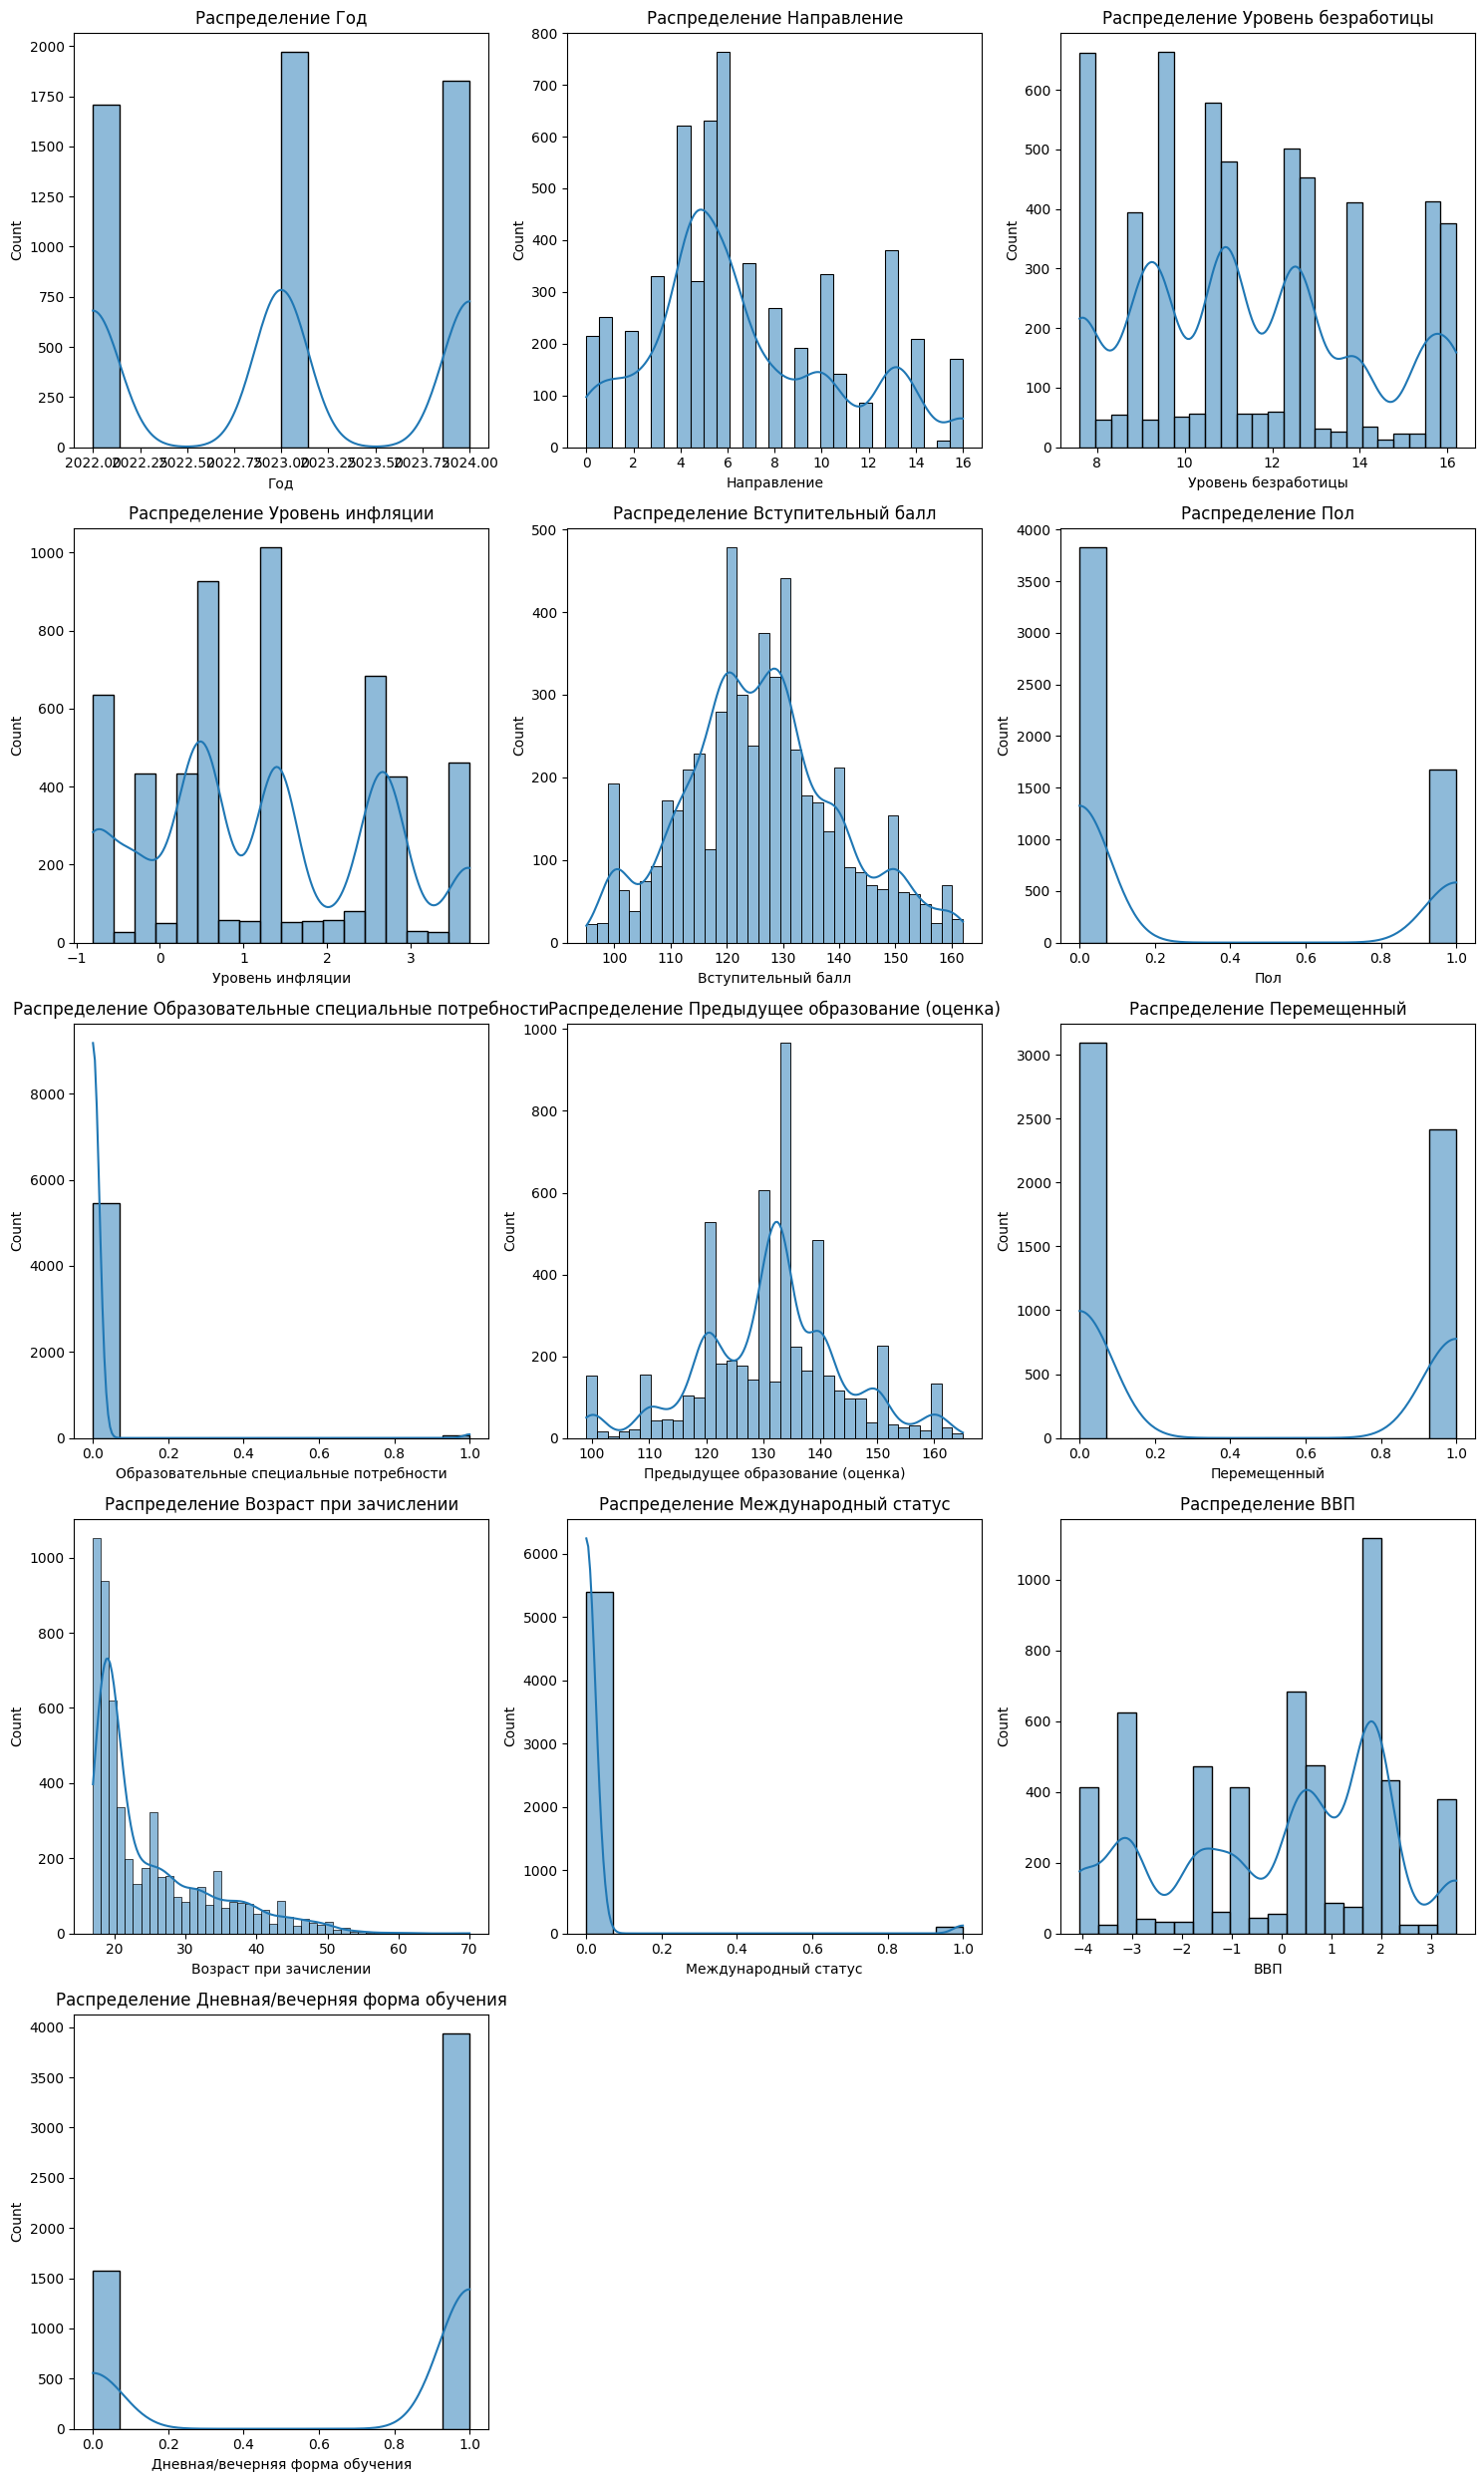

In [486]:
# Определение числовых колонок
numeric_columns = final_df.select_dtypes(include=[np.number]).columns.tolist()

# Определение количества строк и столбцов для подграфиков
num_plots = len(numeric_columns)
num_cols = 3
num_rows = (num_plots // num_cols) + 1 if num_plots % num_cols != 0 else num_plots // num_cols

# Построение графиков
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(final_df[column], kde=True)
    plt.title(f'Распределение {column}')
plt.tight_layout()
plt.show()

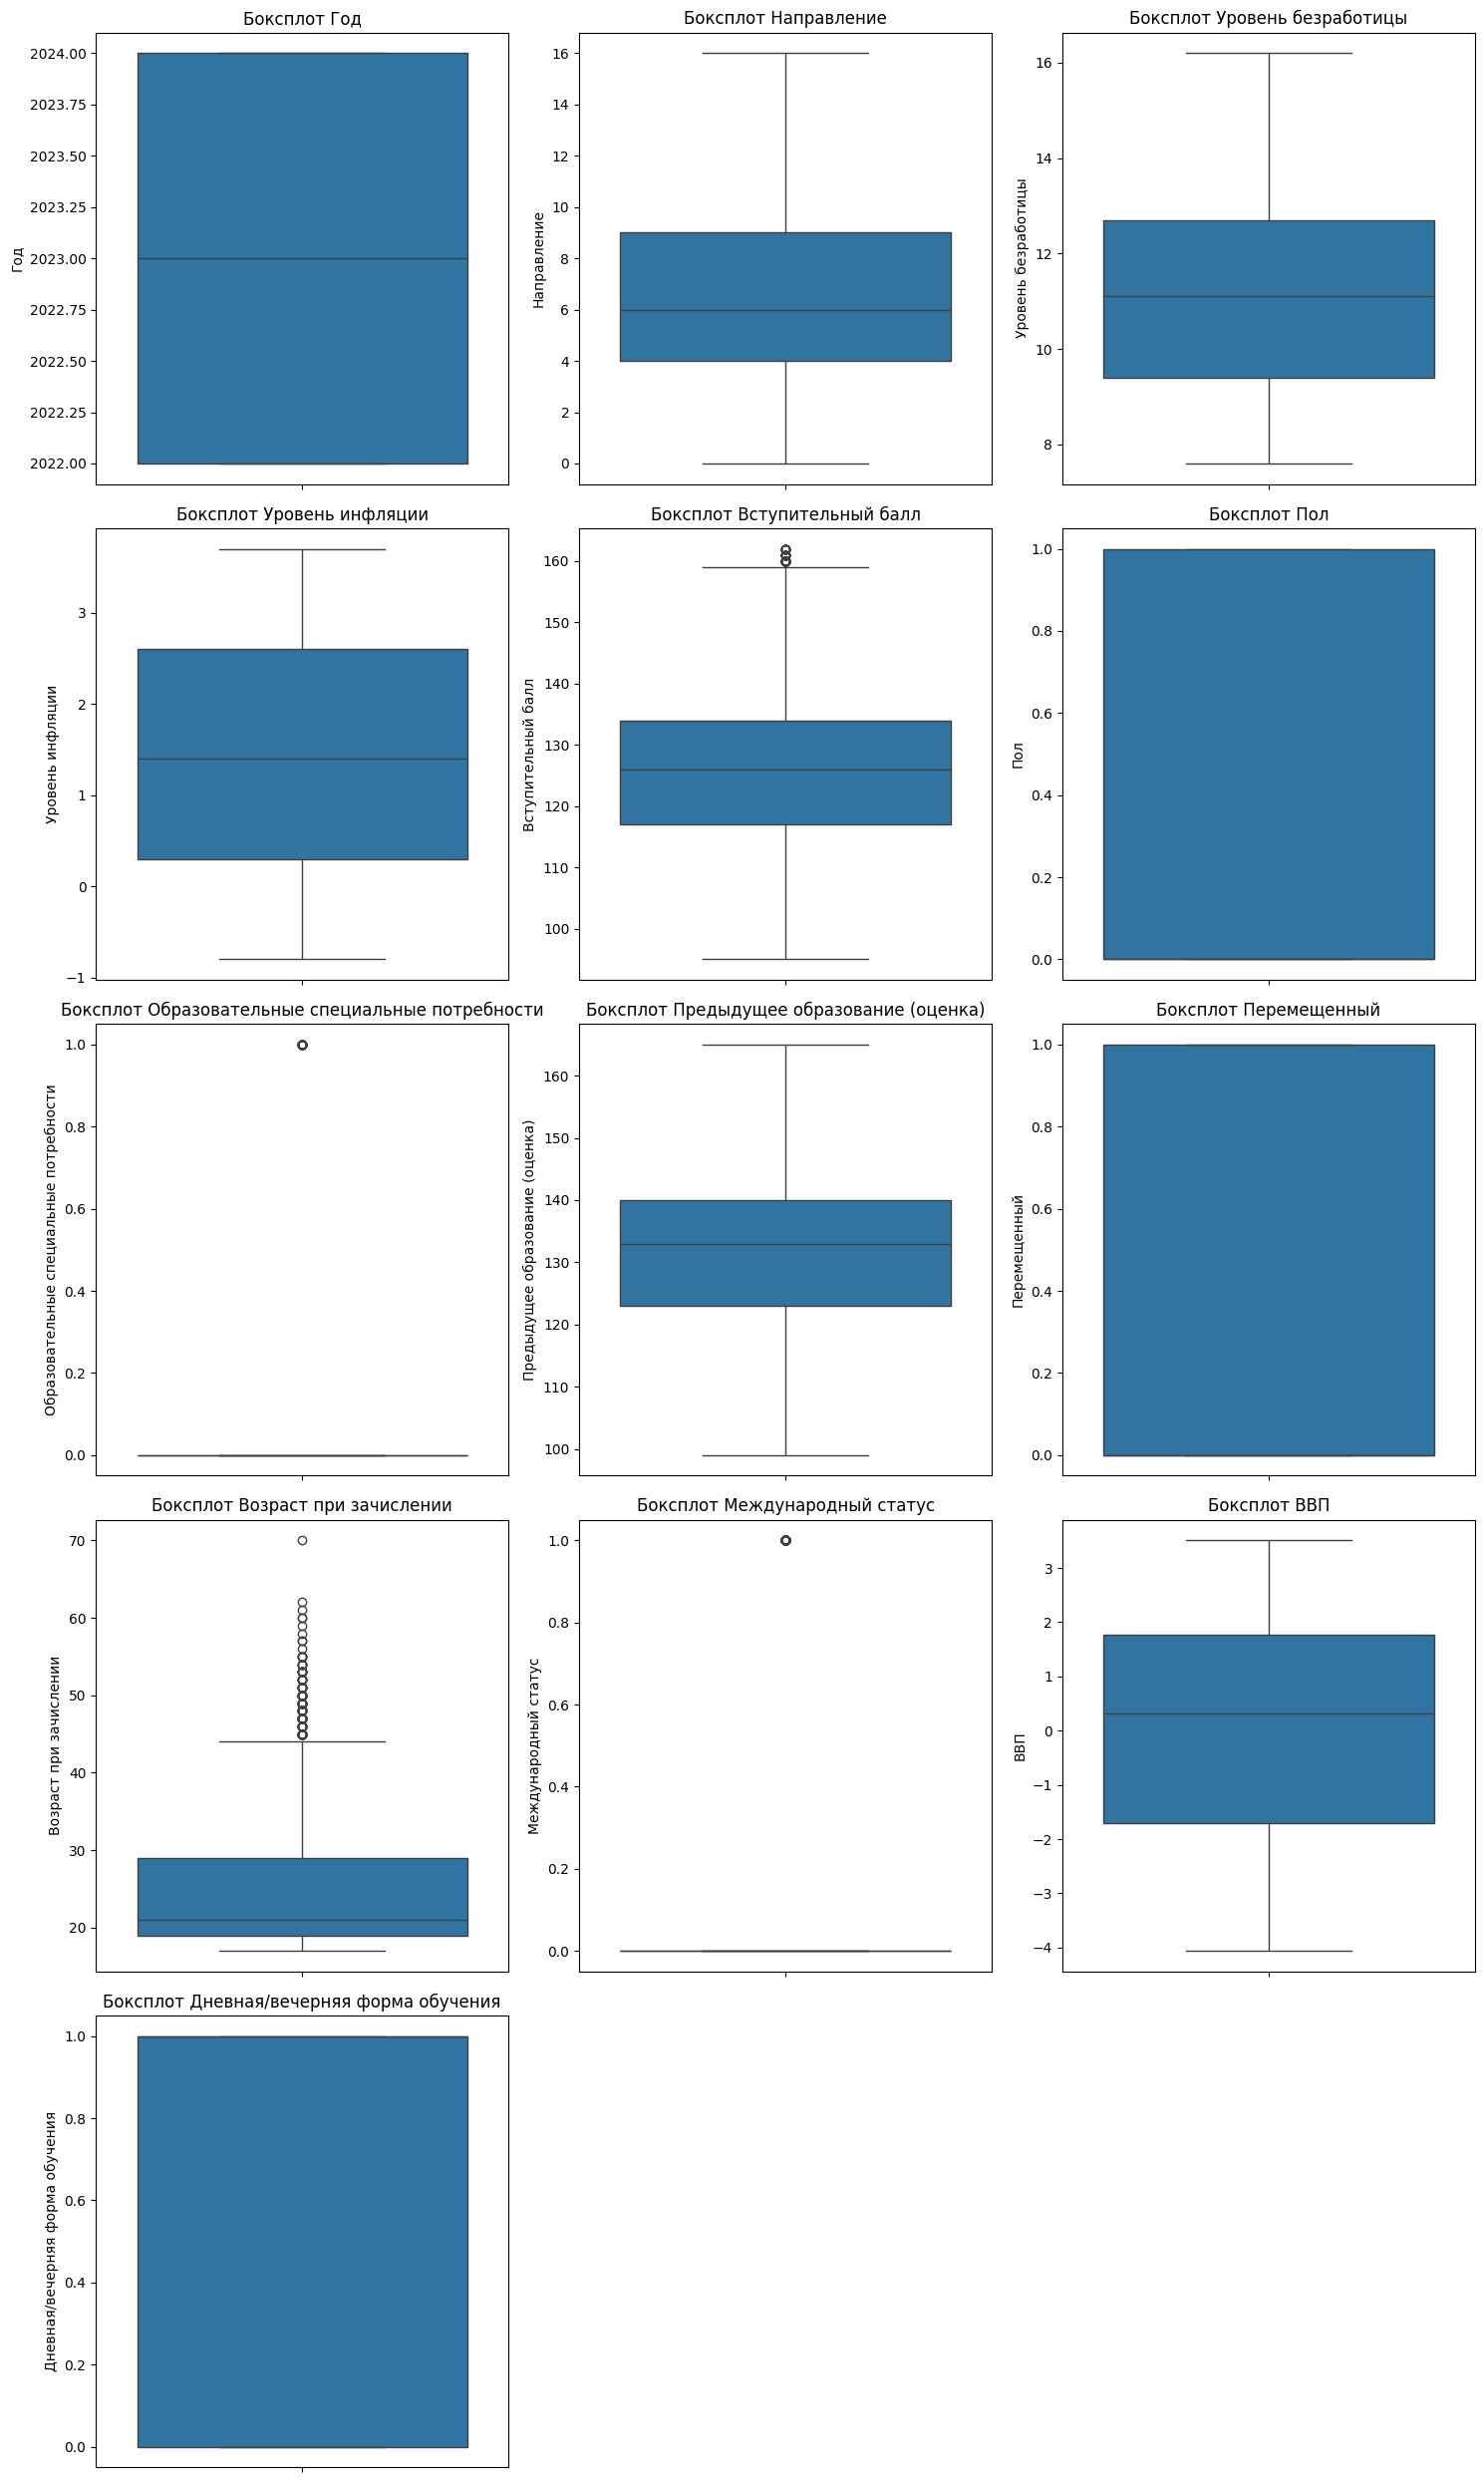

In [487]:
# Боксплоты для выявления выбросов
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=final_df[column])
    plt.title(f'Боксплот {column}')
plt.tight_layout()
plt.show()

In [ ]:
def check_dataframe(df):
    # Проверка дубликатов
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        # Удаление дублирующихся строк
        df.drop_duplicates(inplace=True)
    # Проверка отсутствующих значений
    missing_values = df.isnull().sum()
    # Общее количество строк и колонок
    num_rows, num_columns = df.shape
    # Типы данных колонок
    data_types = df.dtypes
    # Описание статистик по числовым колонкам
    statistics = df.describe()
    
    # Вывод результатов
    print(f"Количество строк: {num_rows}")
    print(f"Количество колонок: {num_columns}")
    print("\nТипы данных каждой колонки:")
    print(data_types)
    print("\nКоличество дубликатов:")
    print(duplicates)
    print("\nКоличество отсутствующих значений:")
    print(missing_values)
    print("\nСтатистическое описание числовых колонок:")
    print(statistics)


check_dataframe(df_balanced)

Количество строк: 6936
Количество колонок: 13

Типы данных каждой колонки:
Год                                        float64
Направление                                float64
Уровень безработицы                        float64
Уровень инфляции                           float64
Вступительный балл                         float64
Образовательные специальные потребности      int64
Предыдущее образование (оценка)            float64
Перемещенный                                 int64
Возраст при зачислении                       int64
Международный статус                         int64
ВВП                                        float64
Дневная/вечерняя форма обучения              int64
Пол                                          int64
dtype: object

Количество дубликатов:
21

Количество отсутствующих значений:
Год                                        0
Направление                                0
Уровень безработицы                        0
Уровень инфляции                           0
Вступ

In [69]:
# Исключение ненужных колонок
columns_to_exclude = ['Образовательные специальные потребности', 'Международный статус']
df = df_balanced.drop(columns=columns_to_exclude)

In [76]:
df_aggregated = df.groupby(['Направление', 'Год']).size().reset_index(name='Количество абитуриентов')

# Добавляем необходимые статистики
agg_funcs = {
    'Вступительный балл': 'mean',
    'Возраст при зачислении': 'mean',
    'Уровень безработицы': 'mean',
    'Уровень инфляции': 'mean',
    'Предыдущее образование (оценка)': 'mean',
    'Перемещенный': 'sum',
    'ВВП': 'mean',
    'Дневная/вечерняя форма обучения': 'mean'
}

# Группировка и агрегация
agg_df = df.groupby(['Год', 'Направление']).agg(agg_funcs).reset_index()

# Добавление доли женщин
df['Доля женщин'] = df.groupby(['Год', 'Направление'])['Пол'].sum().values / df_aggregated['Количество абитуриентов']

# Объединение df_aggregated с agg_df
df = pd.merge(df_aggregated, agg_df, on=['Год', 'Направление'])

,Направление,Год,Количество абитуриентов,Вступительный балл,Возраст при зачислении,Уровень безработицы,Уровень инфляции,Предыдущее образование (оценка),Перемещенный,ВВП,Дневная/вечерняя форма обучения
0,0.0,2022.0,96,136.684625,19.947917,11.640204,1.191914,137.702810,72,-0.188265,1.000000
1,0.0,2023.0,72,137.305701,20.194444,11.365319,1.056961,137.948514,56,0.421514,0.986111
2,0.0,2024.0,82,134.119395,20.463415,11.027709,1.208712,137.221696,60,-0.064816,0.987805
3,1.0,2022.0,79,123.073972,23.531646,11.010151,1.350021,130.435414,44,0.344314,1.000000
4,1.0,2023.0,109,122.245230,20.743119,11.210295,0.919411,127.300758,64,0.363896,0.990826
5,1.0,2024.0,99,120.390470,22.313131,11.418735,1.359366,126.726730,63,0.456042,0.989899
6,2.0,2022.0,96,128.728242,20.812500,11.647062,1.074205,132.498027,60,-0.052376,0.989583
7,2.0,2023.0,85,128.098218,21.364706,12.232694,1.270425,129.964059,47,-0.329875,1.000000
8,2.0,2024.0,78,127.527508,22.230769,11.569117,1.098495,131.987445,49,0.242715,0.961538
9,3.0,2022.0,123,127.809554,21.203252,11.826148,1.322372,131.806901,80,-0.297694,1.000000


Количество абитуриентов            1.000000
Возраст при зачислении             0.453223
Перемещенный                       0.242797
Год                                0.071038
Уровень инфляции                   0.068204
Вступительный балл                -0.060488
Уровень безработицы               -0.100176
Предыдущее образование (оценка)   -0.106738
Направление                       -0.158305
ВВП                               -0.158784
Дневная/вечерняя форма обучения   -0.566191
Name: Количество абитуриентов, dtype: float64


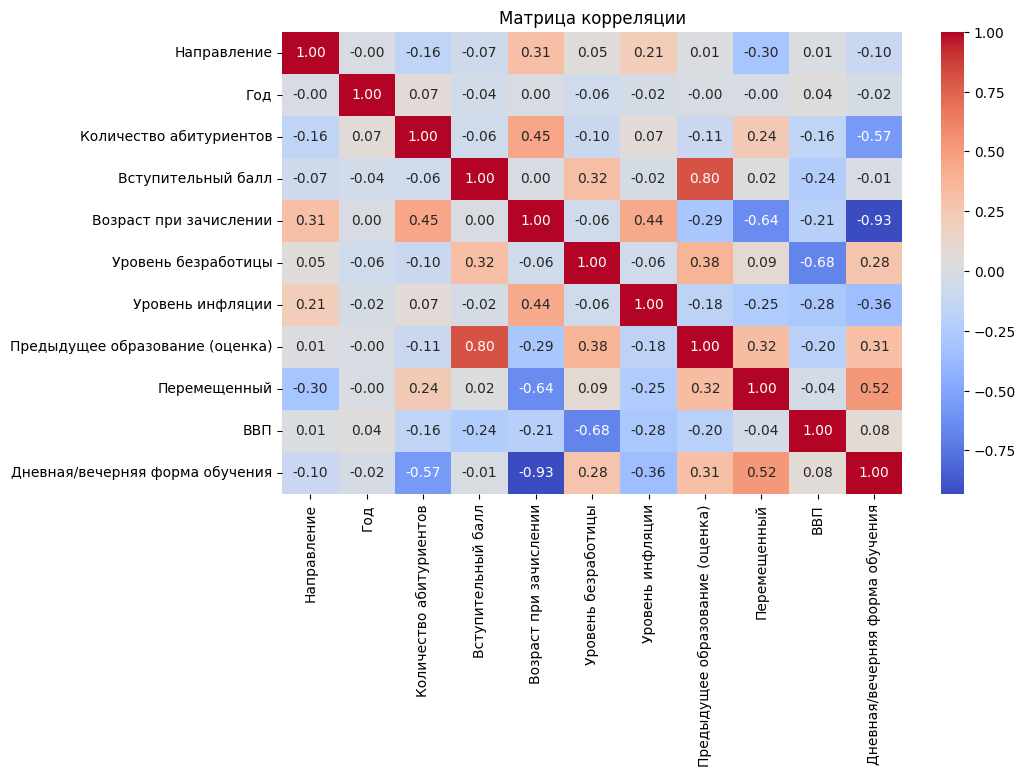

In [77]:
# Анализ корреляции с целевой переменной
correlation_matrix = df.corr()
print(correlation_matrix['Количество абитуриентов'].sort_values(ascending=False))

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()

Количество абитуриентов:
Направление: -0.19
Перемещенный: -0.24
Дневная/вечерняя форма: -0.57
Возраст: 0.3


новое:
1. форма обучения
2. возраст
3. перемещенный


MSE (Random Forest): 4106.921029411766

Важность признаков (Random Forest):
                           Колонка  Важность
9  Дневная/вечерняя форма обучения  0.271007
7                     Перемещенный  0.226406
6  Предыдущее образование (оценка)  0.177794
0                      Направление  0.093374
3           Возраст при зачислении  0.082645
4              Уровень безработицы  0.075220
5                 Уровень инфляции  0.028372
8                              ВВП  0.026551
2               Вступительный балл  0.018631
1                              Год  0.000000


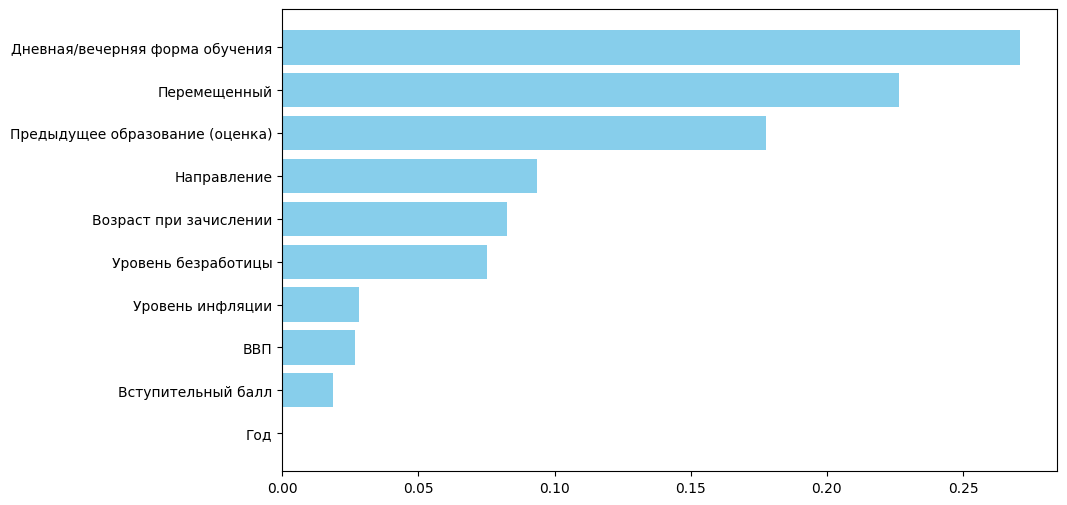

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Определение зависимой и независимых переменных
X = df.drop(columns=['Количество абитуриентов'])
y = df['Количество абитуриентов']

# Разделение на обучающую и тестовую выборки
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X[X['Год'] < 2023]
y_train = y[X['Год'] < 2023]
X_test = X[X['Год'] == 2023]
y_test = y[X['Год'] == 2023]

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_rf = rf_model.predict(X_test)
print("MSE (Random Forest):", mean_squared_error(y_test, y_pred_rf))

# Важность признаков
feature_importances_rf = pd.DataFrame({
    'Колонка': X.columns,
    'Важность': rf_model.feature_importances_
}).sort_values(by='Важность', ascending=False)

print("\nВажность признаков (Random Forest):")
print(feature_importances_rf)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_rf['Колонка'], feature_importances_rf['Важность'], color='skyblue')
plt.gca().invert_yaxis()  # Инвертируем ось Y для лучшего отображения
plt.show()

Наиболее значимые факторы для выбора направления:
Дневная/вечерняя форма обучения
Пол
Возраст 
Перемещенный


MSE (XGBoost): 4171.84033203125

Важность признаков (XGBoost):
                           Колонка  Важность
8                              ВВП  0.468773
9  Дневная/вечерняя форма обучения  0.369611
7                     Перемещенный  0.045636
6  Предыдущее образование (оценка)  0.032788
3           Возраст при зачислении  0.025681
4              Уровень безработицы  0.022681
0                      Направление  0.016732
5                 Уровень инфляции  0.014191
2               Вступительный балл  0.003905
1                              Год  0.000000


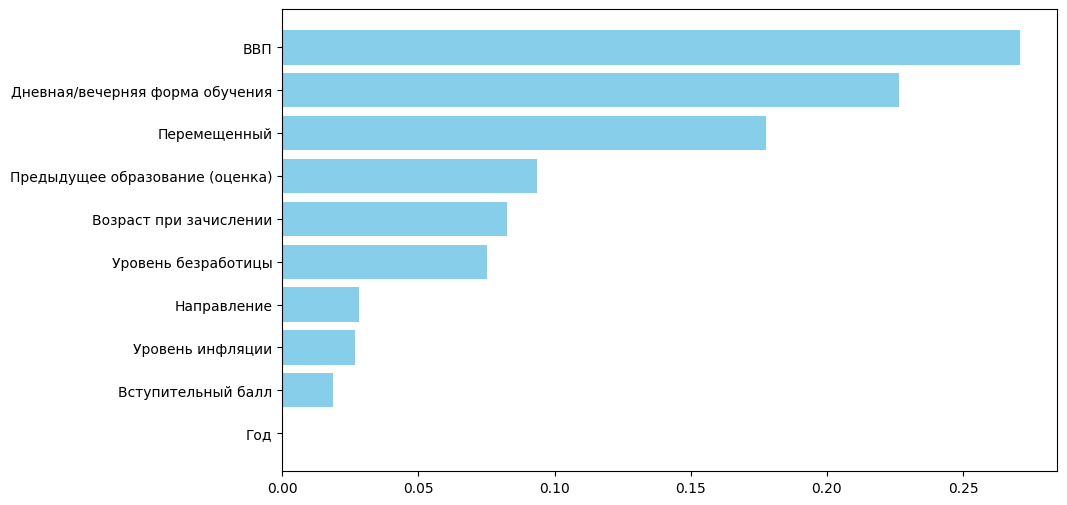

In [81]:
import xgboost as xgb

# XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_xgb = xgb_model.predict(X_test)
print("\nMSE (XGBoost):", mean_squared_error(y_test, y_pred_xgb))

# Важность признаков
feature_importances_xgb = pd.DataFrame({
    'Колонка': X.columns,
    'Важность': xgb_model.feature_importances_
}).sort_values(by='Важность', ascending=False)

print("\nВажность признаков (XGBoost):")
print(feature_importances_xgb)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_xgb['Колонка'], feature_importances_rf['Важность'], color='skyblue')
plt.gca().invert_yaxis()  # Инвертируем ось Y для лучшего отображения
plt.show()

MSE (Lasso-регрессия): 2067.2315613907094
Направление               -1.631574
Возраст при зачислении    13.553072
Перемещенный               1.541064
dtype: float64


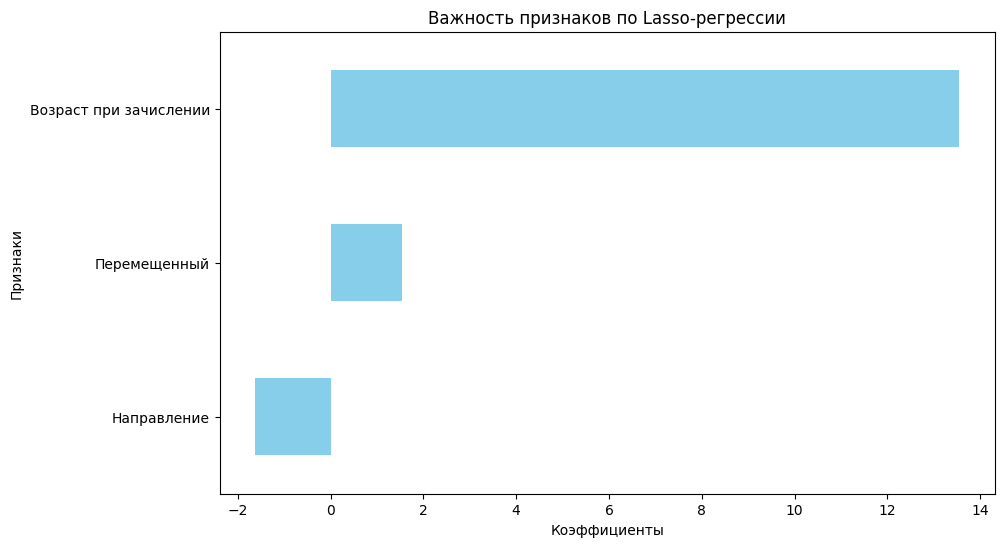

In [82]:
from sklearn.linear_model import LassoCV

# Обучение Lasso-регрессии с кросс-валидацией
lasso_model = LassoCV(cv=5, random_state=42)
lasso_model.fit(X, y)

# Предсказания на тестовой выборке
y_pred = lasso_model.predict(X_test)

# Вычисление MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE (Lasso-регрессия):", mse)

# Вывод значимых коэффициентов
lasso_coefficients = pd.Series(lasso_model.coef_, index=X.columns)
significant_features = lasso_coefficients[lasso_coefficients != 0]
print(significant_features)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
significant_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Важность признаков по Lasso-регрессии')
plt.xlabel('Коэффициенты')
plt.ylabel('Признаки')
plt.show()


1. Пол
2. Дневная/вечерняя форма обучения
3. Возраст 
4. Перемещенный

In [520]:
output_file_path = 'final.csv'
df.to_csv(output_file_path, index=False, encoding='utf-8-sig')